<a href="https://colab.research.google.com/github/ffelfis/OrgaDatosTPs/blob/main/TP1/TP1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Actualización de módulos **[Requiere reinicio del entorno de ejecución]**

In [1]:
# Para usar bar_label se necesita matplotlib versión 3.4 o superior
# La actualización de albumentations es para que no levante un error de versión previa
!pip install albumentations --upgrade
#!pip install imgaug --upgrade
!pip install matplotlib --upgrade
#!pip list

Requirement already up-to-date: albumentations in /usr/local/lib/python3.7/dist-packages (0.5.2)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.7/dist-packages (3.4.2)


## Lectura de datos de Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Librerías

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import cv2
import requests
import matplotlib.image as mpimg
from matplotlib.ticker import FuncFormatter
%matplotlib inline

## Rutas de los archivo `train_values.csv` y `train_labels.csv`

Comentar las rutas presentes y completar con las necesarias.

In [4]:
# Ruta train_values.csv
dir_values = '/content/drive/My Drive/75.06 - Organización de Datos/TP1/Data/train_values.csv'

# Ruta train_labels.csv
dir_labels = '/content/drive/My Drive/75.06 - Organización de Datos/TP1/Data/train_labels.csv'

## Ruta de carpeta con imágenes

Algunas visualizaciones usan archivos de imágenes que están incluídas en la carpeta `imagenes` del repositorio de Github del trabajo práctico.  

https://github.com/ffelfis/OrgaDatosTPs

In [5]:
# Ruta de la carpeta imagenes
dir_img ='/content/drive/My Drive/75.06 - Organización de Datos/TP1/imagenes'

## Lectura de Datasets

In [6]:
train_values = pd.read_csv(dir_values)
train_labels = pd.read_csv(dir_labels)

In [7]:
train_labels.dtypes

building_id     int64
damage_grade    int64
dtype: object

In [8]:
train_values.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

# 0 - Daño Global

In [9]:
ag = {'Cantidad' : ('building_id','count'),}
cantidad_x_magnitud = train_labels.groupby(['damage_grade']).agg(**ag).reset_index()
cantidad_x_magnitud

,damage_grade,Cantidad
0,1,25124
1,2,148259
2,3,87218


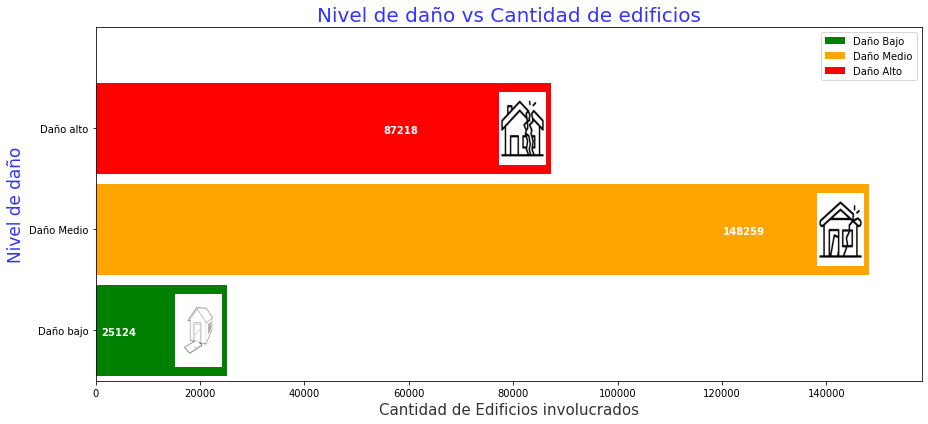

In [10]:
labels =['Daño bajo','Daño Medio','Daño alto']
colors = ['green','orange','red']
levels = ['Daño Bajo','Daño Medio','Daño Alto']
values = cantidad_x_magnitud['Cantidad']

height = 0.9
v =plt.barh(y=labels, width=values, height=height, color=colors, align='center')
plt.title("Nivel de daño vs Cantidad de edificios", fontsize=20, color = 'blue',alpha = 0.8)
plt.ylabel("Nivel de daño", fontsize=17, color = 'blue', alpha = 0.8)
plt.xlabel("Cantidad de Edificios involucrados", fontsize=15, color = 'black', alpha = 0.8)

for i, (label, value) in enumerate(zip(labels, values)):
#    rut = (f'./drive/My Drive/Colab Notebooks/TP1/imagenes/damage{i+1}.jpg')
    rut = (dir_img+f'/damage{i+1}.jpg')
    img = cv2.imread(rut, cv2.IMREAD_COLOR)
    plt.imshow(img, extent=[value - 10000, value - 1000, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2, filterrad=10.0)

plt.xlim(0, max(values)+10000)
plt.ylim(-0.5, 3)
plt.legend(v, levels)

for i, v in enumerate(values):
    izq = 20000 + (i+1)*4000
    plt.text(v - izq,i - .05, str(v), color='white', fontweight='bold')

plt.gcf().set_size_inches(13, 6)
plt.tight_layout()
plt.show()

# 1 - Analisis de Antiguedad de Edificios

In [11]:
#MERGE
values_labels = train_values.merge(train_labels, how = 'inner' , on='building_id')
#print(values_labels.head(1))

ag = {'Cantidad' : ('building_id','count'),}
group_height = train_values.groupby(['height_percentage']).agg(**ag).reset_index()
altura_normalizada_max = group_height['height_percentage'].max()
altura_normalizada_min = group_height['height_percentage'].min()
#print(group_height.head())

ag = {'Cantidad' : ('building_id','count'),}
group_area = train_values.groupby(['area_percentage']).agg(**ag).reset_index()
area_normalizada_max = group_area['area_percentage'].max()
area_normalizada_min = group_area['area_percentage'].min()
#print(group_area.head())

area_high_damage = values_labels.loc[:,['area_percentage','height_percentage','damage_grade','age']]
area_high_damage['g1'] = (area_high_damage['damage_grade'] == 1).astype(int)
area_high_damage['g2'] = (area_high_damage['damage_grade'] == 2).astype(int)
area_high_damage['g3'] = (area_high_damage['damage_grade'] == 3).astype(int)
#print(area_high_damage.head(1))

ag = {'Cantidad_g1' : ('g1','sum'),
        'Cantidad_g2' : ('g2','sum'),
        'Cantidad_g3' : ('g3','sum'),
      }
result = area_high_damage.groupby(['age']).agg(**ag).reset_index()
#print(result.head(10))

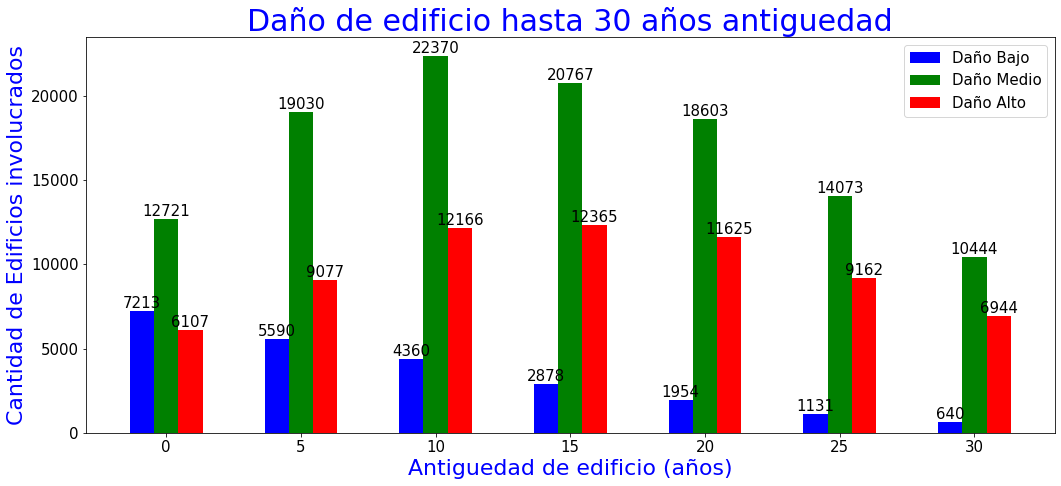

In [12]:
result_30 = result[(result['age'] <= 30)]

labels = result_30['age']

daño_min = result_30['Cantidad_g1']
daño_medio = result_30['Cantidad_g2']  
daño_max = result_30['Cantidad_g3']

plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots()
ax.set_ylabel('Cantidad de Edificios involucrados', fontsize=22, color='blue')
ax.set_xlabel('Antiguedad de edificio (años)', fontsize=22, color='blue')

w = 0.9
bar1 = ax.bar(labels - w, daño_min, width=w, color='b', align='center', label = 'Daño Bajo')
bar2 = ax.bar(labels, daño_medio, width=w, color='g', align='center',label = 'Daño Medio')
bar3 = ax.bar(labels + w, daño_max, width=w, color='r', align='center', label = 'Daño Alto')

ax.set_title('Daño de edificio hasta 30 años antiguedad',fontsize=30, color='blue')
#ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.00*h, '%d'%int(h),
                ha='center', va='bottom')
        
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.gcf().set_size_inches(15, 7)
fig.tight_layout()
plt.show()

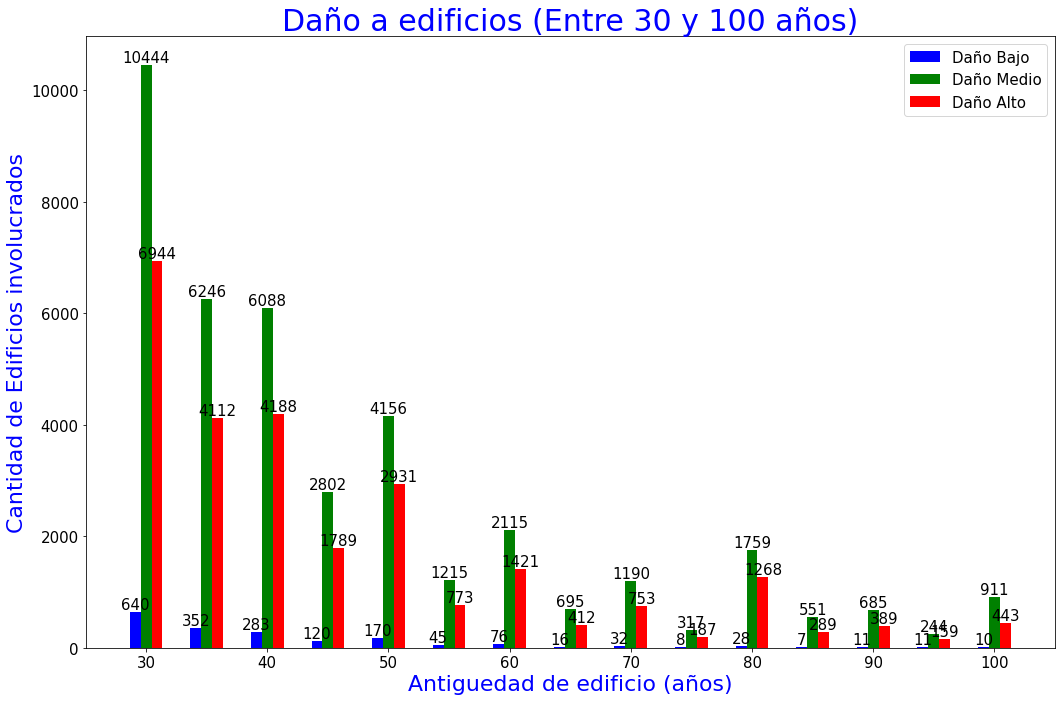

In [13]:
result_mas_30 = result[(result['age'] >= 30) & (result['age'] <= 100) ]

labels = result_mas_30['age']

daño_min = result_mas_30['Cantidad_g1']
daño_medio = result_mas_30['Cantidad_g2']  
daño_max = result_mas_30['Cantidad_g3']

plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots()
ax.set_ylabel('Cantidad de Edificios involucrados', fontsize=22, color='blue')
ax.set_xlabel('Antiguedad de edificio (años)', fontsize=22, color='blue')

w = 0.9
bar1 = ax.bar(labels - w, daño_min, width=w, color='b', align='center', label = 'Daño Bajo')
bar2 = ax.bar(labels, daño_medio, width=w, color='g', align='center',label = 'Daño Medio')
bar3 = ax.bar(labels + w, daño_max, width=w, color='r', align='center', label = 'Daño Alto')

ax.set_title('Daño a edificios (Entre 30 y 100 años)',fontsize=30, color='blue')
#ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.00*h, '%d'%int(h),
                ha='center', va='bottom')
        
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.gcf().set_size_inches(15, 10)
fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

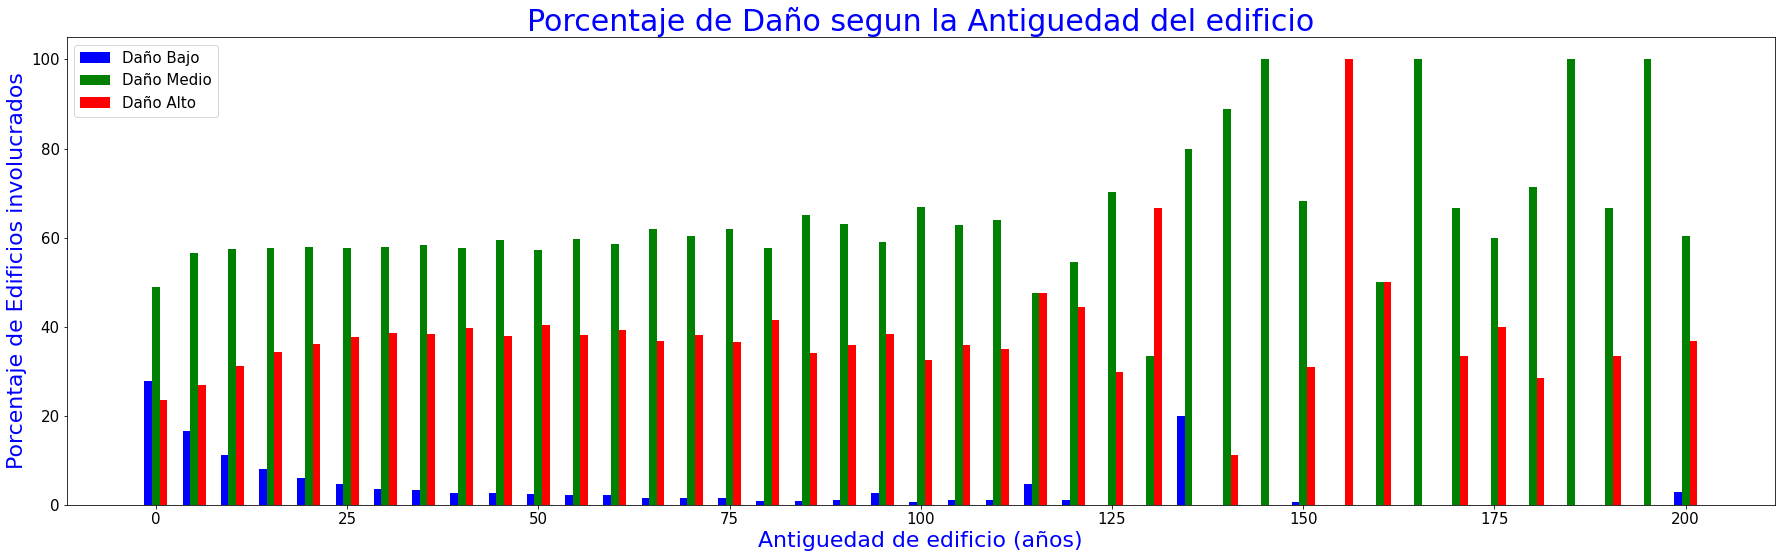

In [14]:

prom = result[(result['age'] <= 200)]
prom['total'] = prom['Cantidad_g1'] + prom['Cantidad_g2'] + prom['Cantidad_g3'] 
prom['p1'] = prom['Cantidad_g1'] * 100 / prom['total'] 
prom['p2'] = prom['Cantidad_g2'] * 100 / prom['total'] 
prom['p3'] = prom['Cantidad_g3'] * 100 / prom['total'] 

labels = prom['age']

daño_min = prom['p1']
daño_medio = prom['p2']  
daño_max = prom['p3']

plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots()
ax.set_ylabel('Porcentaje de Edificios involucrados', fontsize=22, color='blue')
ax.set_xlabel('Antiguedad de edificio (años)', fontsize=22, color='blue')

w = 1
bar1 = ax.bar(labels - w, daño_min, width=w, color='b', align='center', label = 'Daño Bajo')
bar2 = ax.bar(labels, daño_medio, width=w, color='g', align='center',label = 'Daño Medio')
bar3 = ax.bar(labels + w, daño_max, width=w, color='r', align='center', label = 'Daño Alto')

ax.set_title('Porcentaje de Daño segun la Antiguedad del edificio',fontsize=30, color='blue')
#ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    anterior = 0
    for rect in rects:
      h = rect.get_height()
      if(h):
        #print(str(round(h,1)) + '!=?' + str(round(anterior,1)))
        ax.text(rect.get_x()+rect.get_width()/2., 1.00*h, '%d'%int(h) + '%',ha='center', va='bottom')
      anterior = h
        
#autolabel(bar1)
#autolabel(bar2)
#autolabel(bar3)

plt.gcf().set_size_inches(25, 8)
fig.tight_layout()
plt.show()

**Conclusión**
Pueden observarse claramente comom a medida que los años de aniguedad se incrementan los daños minimos pasan a ascender al nivel de daños medio y altos. 
Los edificios que aaún siquiera cumplen años reciben un porcentaje de daño bajo superior al daño grave. 

El daño medio se mantiene sin importar los años, con excepciones en antiguedades como por ejemplo 130 o 155 años, donde los daños graves son absolutos o comparten el mismo porcentaje. 

También en general puede observarse que los daños bajos a partir de los 25 años disminuyen o son nulos con una exepción en los 135 años de antiguedad. 

Estas variaciones o excepciones pueden ser analizadas más en profundidad puntualizando en el tipo de materiales o pisos que concentran ese grupo de datos.

**Años de antiguedad importantes a analizar :** 

Daños bajos y medios : 135

Daños unicamente medios : 145,165,185,195

Daños unicamente graves o 50%: 130,155,160

**Importante a separar en :**

Edificios entre 100 y 200, 200 y 500, 500 o más.


**Cuestiones:**
Analizar que materiales poseen.
Analizar cuantos pisos.
Districion por periodos y edad.


# Relación de daños con materiales

In [15]:
#MERGE
values_labels = train_values.merge(train_labels, how = 'inner' , on='building_id')

#FILTRO COLUMNAS
col = list(values_labels.columns)
filtro1 = [col for col in values_labels if col.find('has_superstructure')>=0]
filtro1.append('age')
materiales = values_labels.loc[:,filtro1]
traducciones = ['adobe_barro','barro_piedra','piedra','cemento_piedra','barro_ladrillos','cemento_ladrillos','madera','caña','concreto_reforzado','concreto_reforzado_diseñado','otros','antiguedad']

def renombrar_columnas(df):
    i = 0
    for nombre in filtro1:
        newname = traducciones[i]
        i = i+1 
        df = df.rename(columns={nombre : newname}) #nombre[19:len(s)]
    return df

#RENOMBRO COLUMNAS
materiales = renombrar_columnas(materiales)
materiales.drop('otros', axis='columns', inplace=True)
ag = {'Cantidad_g1' : ('g1','sum'),
        'Cantidad_g2' : ('g2','sum'),
        'Cantidad_g3' : ('g3','sum'),
      }

#FILTRO POR LAS FECHAS DESTACADAS
materiales_30 = materiales[(materiales['antiguedad'] >= 130) & (materiales['antiguedad'] <= 135)]
result = materiales_30.groupby(['antiguedad']).agg('sum').reset_index()

#QUITO MATERIALES INEXISTENTES CON ESAS ANTIGUEDADES
result.drop(['piedra','cemento_piedra','caña','concreto_reforzado_diseñado'],axis = 'columns',inplace=True) 
result['total'] = result.iloc[:,1:7].sum(axis=1)
result['adobe_barro'] = result['adobe_barro'] * 100 / result['total'] 
result['barro_piedra'] = result['barro_piedra'] * 100 / result['total'] 
result['barro_ladrillos'] = result['barro_ladrillos'] * 100 / result['total'] 
result['cemento_ladrillos'] = result['cemento_ladrillos'] * 100 / result['total'] 
result['madera'] = result['madera'] * 100 / result['total'] 
result['concreto_reforzado'] = result['concreto_reforzado'] * 100 / result['total'] 
#result.drop(['antiguedad','total'],axis = 'columns',inplace=True) 
result

,antiguedad,adobe_barro,barro_piedra,barro_ladrillos,cemento_ladrillos,madera,concreto_reforzado,total
0,130,9.090909,72.727273,9.090909,0.0,9.090909,0.0,11
1,135,25.000000,25.000000,25.000000,12.5,0.000000,12.5,8


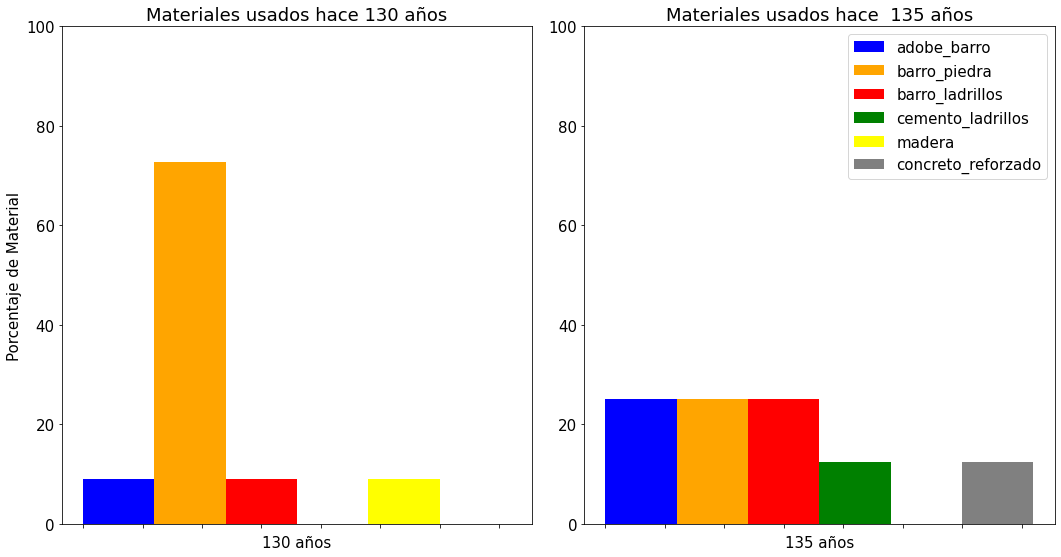

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import cv2

#FILTROS DE AÑOS
result_130 = result[result['antiguedad']==130]
result_135 = result[result['antiguedad']==135]


#CONFIG VISUALIZACION
plt.rcParams.update({'font.size': 15})
fig, (ax1, ax2) = plt.subplots(1, 2)
ax.set_ylabel('Cantidad de Edificios involucrados', fontsize=22, color='blue')
ax.set_xlabel('Antiguedad de edificio (años)', fontsize=22, color='blue')
w = 0.3


#ANTIGUEDAD 130
labels = result_130['antiguedad']
adobe_barro = result_130['adobe_barro']
barro_piedra = result_130['barro_piedra']  
barro_ladrillos = result_130['barro_ladrillos']
cemento_ladrillos = result_130['cemento_ladrillos']
madera	 = result_130['madera']  
concreto_reforzado = result_130['concreto_reforzado']

bar1 = ax1.bar(labels - (w*2), adobe_barro, width=w, color='blue', align='center', label = 'adobe_barro')
bar2 = ax1.bar(labels -w, barro_piedra, width=w, color='orange', align='center',label = 'barro_piedra')
bar3 = ax1.bar(labels, barro_ladrillos, width=w, color='red', align='center', label = 'barro_ladrillos')
bar4 = ax1.bar(labels + w, cemento_ladrillos, width=w, color='green', align='center', label = 'cemento_ladrillos')
bar5 = ax1.bar(labels + (w*2), madera, width=w, color='yellow', align='center',label = 'madera')
bar6 = ax1.bar(labels + (w*3), concreto_reforzado, width=w, color='grey', align='center', label = 'concreto_reforzado')


#ANTIGUEDAD 135
labels = result_135['antiguedad']
adobe_barro = result_135['adobe_barro']
barro_piedra = result_135['barro_piedra']  
barro_ladrillos = result_135['barro_ladrillos']
cemento_ladrillos = result_135['cemento_ladrillos']
madera	 = result_135['madera']  
concreto_reforzado = result_135['concreto_reforzado']

bar1 = ax2.bar(labels - (w*2), adobe_barro, width=w, color='blue', align='center', label = 'adobe_barro')
bar2 = ax2.bar(labels -w, barro_piedra, width=w, color='orange', align='center',label = 'barro_piedra')
bar3 = ax2.bar(labels, barro_ladrillos, width=w, color='red', align='center', label = 'barro_ladrillos')
bar4 = ax2.bar(labels + w, cemento_ladrillos, width=w, color='green', align='center', label = 'cemento_ladrillos')
bar5 = ax2.bar(labels + (w*2), madera, width=w, color='yellow', align='center',label = 'madera')
bar6 = ax2.bar(labels + (w*3), concreto_reforzado, width=w, color='grey', align='center', label = 'concreto_reforzado')


#ax1.set_title('Daño de edificio hasta 30 años antiguedad',fontsize=30, color='blue')
#ax.set_xticklabels(labels)

ax2.legend()
ax1.axes.xaxis.set_ticklabels([])
ax2.axes.xaxis.set_ticklabels([])

rut = (f'./drive/My Drive/Colab Notebooks/TP1/imagenes/damage3.jpg')
#img = cv2.imread(rut, cv2.IMREAD_COLOR)
#ax1.imshow(rut)
    
data=[adobe_barro,barro_piedra,barro_piedra,barro_ladrillos,cemento_ladrillos,madera,concreto_reforzado]
images=[rut,rut,rut,rut,rut,rut,rut]
#image_plot(data, flags, spacing=2)
  
#plt.xlim(130, max(labels))
#plt.xticks(2,2)
#plt.rcParams['axes.facecolor']='white'
#plt.rcParams['savefig.facecolor']='white'
#ax = plt.gca()

ax1.set_facecolor((1, 1, 1))
ax2.set_facecolor((1, 1, 1))
ax1.set_ylim([0, 100])
ax2.set_ylim([0, 100])
ax1.set_title('Materiales usados hace 130 años')
ax2.set_title('Materiales usados hace  135 años')

ax1.set(xlabel='130 años', ylabel='Porcentaje de Material')
ax2.set(xlabel='135 años')

plt.gcf().set_size_inches(15, 8)
fig.tight_layout()
plt.show()

In [17]:
result_130 = result[result['antiguedad']==130]
result_130.drop(['antiguedad','total'],axis = 'columns',inplace=True) 
result_130 = result_130.transpose().reset_index()
result_130.rename(index=str, columns={0: "New name"})
result_130 = result_130.rename(index=str, columns={0: "Porcentaje", 'index':'Material'})
result_130

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Material,Porcentaje
0,adobe_barro,9.090909
1,barro_piedra,72.727273
2,barro_ladrillos,9.090909
3,cemento_ladrillos,0.000000
4,madera,9.090909
5,concreto_reforzado,0.000000


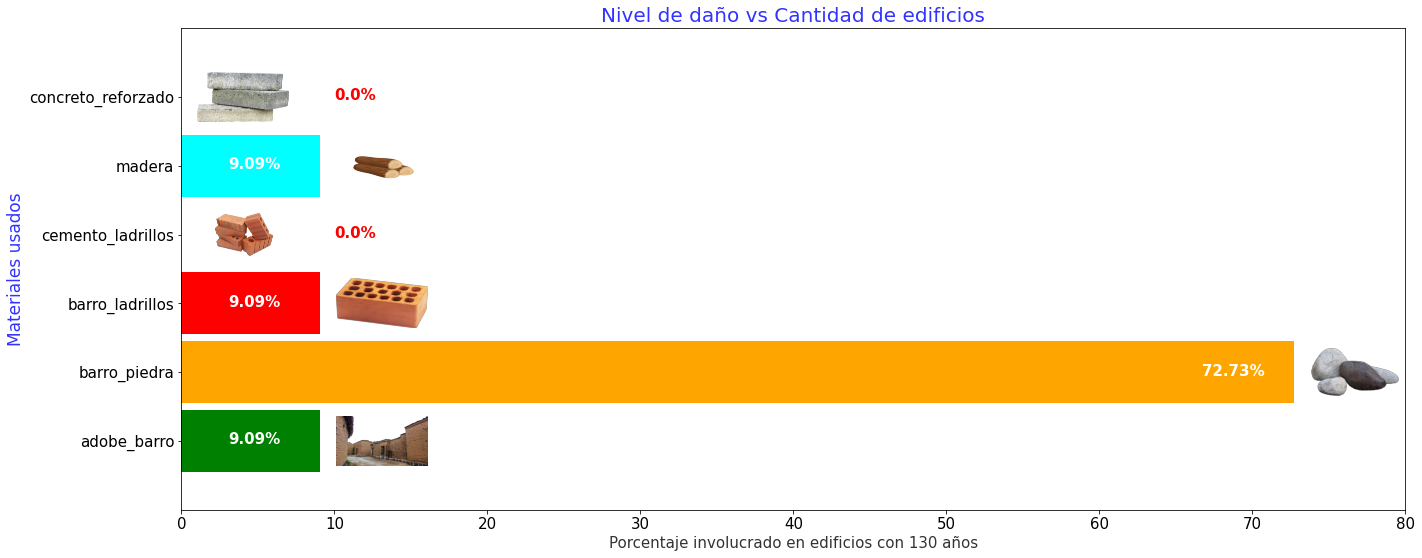

In [18]:
labels = result_130['Material'].tolist()
colors = ['green','orange','red','grey','cyan','blue']
levels = ['Daño Bajo','Daño Medio','Daño Alto']
values = result_130['Porcentaje'].tolist()

height = 0.9
v =plt.barh(y=labels, width=values, height=height, color=colors, align='center')
plt.title("Nivel de daño vs Cantidad de edificios", fontsize=20, color = 'blue',alpha = 0.8)
plt.ylabel("Materiales usados", fontsize=17, color = 'blue', alpha = 0.8)
plt.xlabel("Porcentaje involucrado en edificios con 130 años", fontsize=15, color = 'black', alpha = 0.8)

tip = ['adobe_barro','barro_piedra','barro_ladrillos','cemento_ladrillos','madera','concreto_reforzado']
for i, (label, value) in enumerate(zip(labels, values)):
#   rut = (f'./drive/My Drive/Colab Notebooks/TP1/imagenes/materiales/iconos/{tip[i]}.png')
   rut = (dir_img+f'/materiales/iconos/{tip[i]}.png')
   img = mpimg.imread(rut)
   plt.imshow(img, extent=[value + 1, value +7, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2, filterrad=10.0)


plt.xlim(0, 80)
plt.ylim(-1, 6)

for i, v in enumerate(values):
    izq = 10 + (i+1)*1
    if v == 0.0 :
      position = v + 10
      colors = 'red'
    else : 
      position = v - 6
      colors = 'white'
    plt.text(position,i - .05, str(round(v, 2)) + '%', color=colors, fontweight='bold')

plt.gcf().set_size_inches(20, 8)
plt.tight_layout()
plt.show()

In [19]:
result_135 = result[result['antiguedad']==135]
result_135.drop(['antiguedad','total'],axis = 'columns',inplace=True) 
result_135 = result_135.transpose().reset_index()
result_135.rename(index=str, columns={0: "New name"})
result_135 = result_135.rename(index=str, columns={1: "Porcentaje", 'index':'Material'})
result_135

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Material,Porcentaje
0,adobe_barro,25.0
1,barro_piedra,25.0
2,barro_ladrillos,25.0
3,cemento_ladrillos,12.5
4,madera,0.0
5,concreto_reforzado,12.5


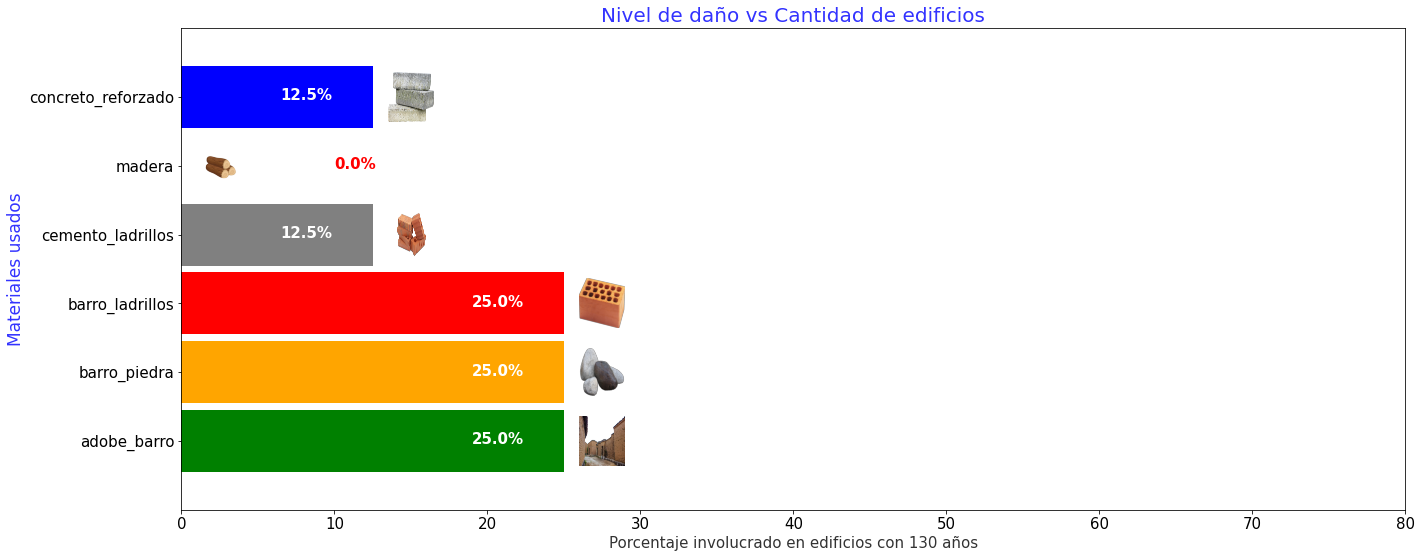

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import cv2
import requests
import matplotlib.image as mpimg

labels = result_135['Material'].tolist()
colors = ['green','orange','red','grey','cyan','blue']
levels = ['Daño Bajo','Daño Medio','Daño Alto']
values = result_135['Porcentaje'].tolist()

height = 0.9
v =plt.barh(y=labels, width=values, height=height, color=colors, align='center')
plt.title("Nivel de daño vs Cantidad de edificios", fontsize=20, color = 'blue',alpha = 0.8)
plt.ylabel("Materiales usados", fontsize=17, color = 'blue', alpha = 0.8)
plt.xlabel("Porcentaje involucrado en edificios con 130 años", fontsize=15, color = 'black', alpha = 0.8)

tip = ['adobe_barro','barro_piedra','barro_ladrillos','cemento_ladrillos','madera','concreto_reforzado']
for i, (label, value) in enumerate(zip(labels, values)):
#   rut = (f'./drive/My Drive/Colab Notebooks/TP1/imagenes/materiales/iconos/{tip[i]}.png')
   rut = (dir_img+f'/materiales/iconos/{tip[i]}.png')
   img = mpimg.imread(rut)
   plt.imshow(img, extent=[value + 1, value +4, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2, filterrad=10.0)


plt.xlim(0, 80)
plt.ylim(-1, 6)
#plt.legend(v, labels)

for i, v in enumerate(values):
    izq = 10 + (i+1)*1
    if v == 0.0 :
      position = v + 10
      colors = 'red'
    else : 
      position = v - 6
      colors = 'white'
    plt.text(position,i - .05, str(round(v, 2)) + '%', color=colors, fontweight='bold')

plt.gcf().set_size_inches(20, 8)
plt.tight_layout()
plt.show()

In [21]:
#FILTRO POR LAS FECHAS DESTACADAS
materiales_55 = materiales[(materiales['antiguedad'] == 155)]
result = materiales_55.groupby(['antiguedad']).agg('sum').reset_index()

#QUITO MATERIALES INEXISTENTES CON ESAS ANTIGUEDADES
result.drop(['piedra','cemento_piedra','caña','concreto_reforzado_diseñado'],axis = 'columns',inplace=True) 
result['total'] = result.iloc[:,1:7].sum(axis=1)
result['adobe_barro'] = result['adobe_barro'] * 100 / result['total'] 
result['barro_piedra'] = result['barro_piedra'] * 100 / result['total'] 
result['barro_ladrillos'] = result['barro_ladrillos'] * 100 / result['total'] 
result['cemento_ladrillos'] = result['cemento_ladrillos'] * 100 / result['total'] 
result['madera'] = result['madera'] * 100 / result['total'] 
result['concreto_reforzado'] = result['concreto_reforzado'] * 100 / result['total'] 
#result.drop(['antiguedad','total'],axis = 'columns',inplace=True) 
result



,antiguedad,adobe_barro,barro_piedra,barro_ladrillos,cemento_ladrillos,madera,concreto_reforzado,total
0,155,100.0,0.0,0.0,0.0,0.0,0.0,1


In [22]:
result_155 = result
result_155.drop(['antiguedad','total'],axis = 'columns',inplace=True) 
result_155 = result_155.transpose().reset_index()
#result_155.rename(index=str, columns={0: "New name"})
result_155 = result_155.rename(index=str, columns={0: "Porcentaje", 'index':'Material'})
result_155

,Material,Porcentaje
0,adobe_barro,100.0
1,barro_piedra,0.0
2,barro_ladrillos,0.0
3,cemento_ladrillos,0.0
4,madera,0.0
5,concreto_reforzado,0.0


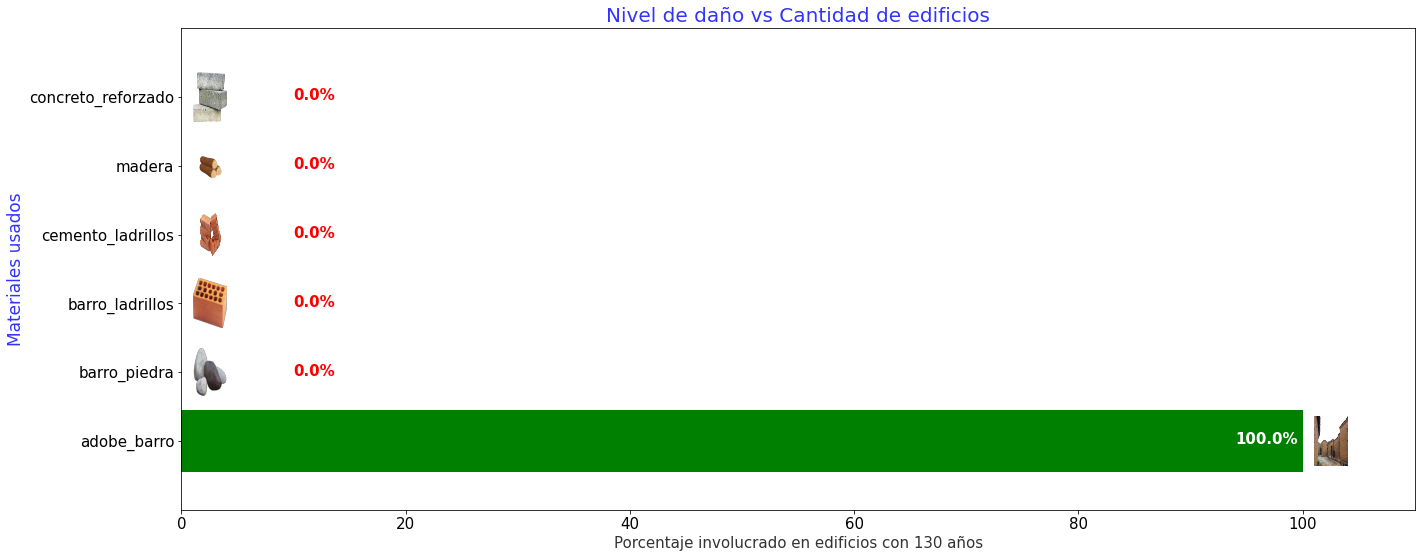

In [23]:
labels = result_155['Material'].tolist()
colors = ['green','orange','red','grey','cyan','blue']
levels = ['Daño Bajo','Daño Medio','Daño Alto']
values = result_155['Porcentaje'].tolist()

height = 0.9
v =plt.barh(y=labels, width=values, height=height, color=colors, align='center')
plt.title("Nivel de daño vs Cantidad de edificios", fontsize=20, color = 'blue',alpha = 0.8)
plt.ylabel("Materiales usados", fontsize=17, color = 'blue', alpha = 0.8)
plt.xlabel("Porcentaje involucrado en edificios con 130 años", fontsize=15, color = 'black', alpha = 0.8)

tip = ['adobe_barro','barro_piedra','barro_ladrillos','cemento_ladrillos','madera','concreto_reforzado']
for i, (label, value) in enumerate(zip(labels, values)):
#   rut = (f'./drive/My Drive/Colab Notebooks/TP1/imagenes/materiales/iconos/{tip[i]}.png')
   rut = (dir_img+f'/materiales/iconos/{tip[i]}.png')
   img = mpimg.imread(rut)
   plt.imshow(img, extent=[value + 1, value +4, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2, filterrad=10.0)


plt.xlim(0, 110)
plt.ylim(-1, 6)
#plt.legend(v, labels)

for i, v in enumerate(values):
    izq = 10 + (i+1)*1
    if v == 0.0 :
      position = v + 10
      colors = 'red'
    else : 
      position = v - 6
      colors = 'white'
    plt.text(position,i - .05, str(round(v, 2)) + '%', color=colors, fontweight='bold')

plt.gcf().set_size_inches(20, 8)
plt.tight_layout()
plt.show()

**Año 130: Daños Graves y Medios**
Materiales utilizados principalmente piedras y barro y algunas estructuras de madera

**Año 135: Daños Medios y bajos**
Se equilibra la utilizacion de piedras y barro y se incrementa la utilizacion de ladrillos y concreto. No se presentan estructuras con madera

**Año 155: Daños graves**
Sin embargo tenemos unicamente un solo caso de edificacion afectado. El cual es de barro. Este dato no es relevante.


Podemos tomar el valor de adobe para determinar si el nivel de daño es superior en comparacion con concreto o ladrillos.

In [24]:
values_labels = train_values.merge(train_labels, how = 'inner' , on='building_id')
values_labels.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [25]:
#MERGE
values_labels = train_values.merge(train_labels, how = 'inner' , on='building_id')

adobe = values_labels[(values_labels['has_superstructure_adobe_mud'] == 1)]
cemento = values_labels[(values_labels['has_superstructure_rc_non_engineered'] == 1) | (values_labels['has_superstructure_rc_engineered'] == 1)]
total_adobe = adobe.shape[0]
total_cemento = cemento.shape[0]

In [26]:
adobe = adobe.loc[:,['damage_grade']]
ag = {'Cantidad' : ('damage_grade','count'),}
danio_adobe = adobe.groupby(['damage_grade']).agg(**ag).reset_index()
danio_adobe['total'] = total_adobe
danio_adobe['promedio'] = danio_adobe.Cantidad / danio_adobe.total
danio_adobe

,damage_grade,Cantidad,total,promedio
0,1,594,23101,0.025713
1,2,13902,23101,0.601792
2,3,8605,23101,0.372495


In [27]:
cemento = cemento.loc[:,['damage_grade']]
ag = {'Cantidad' : ('damage_grade','count'),}
danio_cemento = cemento.groupby(['damage_grade']).agg(**ag).reset_index()
danio_cemento['total'] = total_cemento
danio_cemento['promedio'] = danio_cemento.Cantidad / danio_cemento.total
danio_cemento

,damage_grade,Cantidad,total,promedio
0,1,6453,15137,0.426306
1,2,7203,15137,0.475854
2,3,1481,15137,0.097840


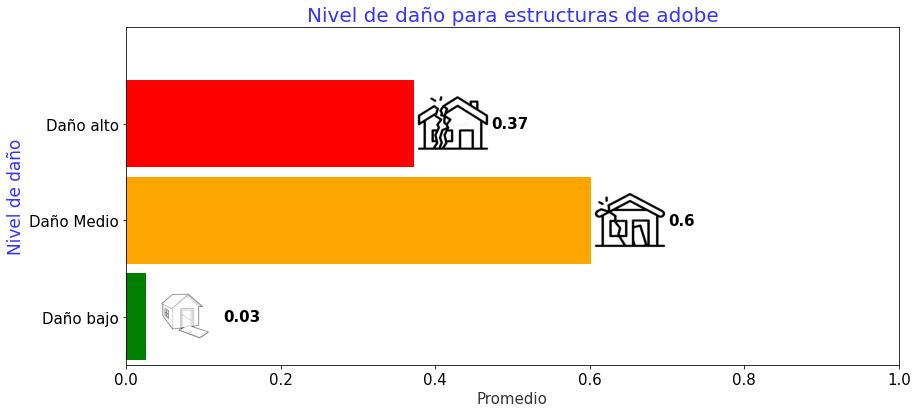

In [28]:
labels =['Daño bajo','Daño Medio','Daño alto']
colors = ['green','orange','red']
levels = ['Daño Bajo','Daño Medio','Daño Alto']
values = danio_adobe['promedio']

height = 0.9
v =plt.barh(y=labels, width=values, height=height, color=colors, align='center')
plt.title("Nivel de daño para estructuras de adobe", fontsize=20, color = 'blue',alpha = 0.8)
plt.ylabel("Nivel de daño", fontsize=17, color = 'blue', alpha = 0.8)
plt.xlabel("Promedio", fontsize=15, color = 'black', alpha = 0.8)

for i, (label, value) in enumerate(zip(labels, values)):
#    rut = (f'./drive/My Drive/Colab Notebooks/TP1/imagenes/damage{i+1}.jpg')
    rut = (dir_img+f'/damage{i+1}.jpg')
    img = cv2.imread(rut, cv2.IMREAD_COLOR)
    plt.imshow(img, extent=[value+0.1, value, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2, filterrad=10.0)

plt.xlim(0,1)
plt.ylim(-0.5, 3)
#plt.legend(v, levels)

for i, v in enumerate(values):
    izq = (i+1)*0.1
    if v == 0.0 :
      position = v - 10
      colors = 'red'
    else : 
      position = v 
      colors = 'black'
    plt.text(v+0.1,i - 0.05, str(round(v, 2)), color=colors, fontweight='bold')

plt.gcf().set_size_inches(13, 6)
plt.tight_layout()
plt.show()

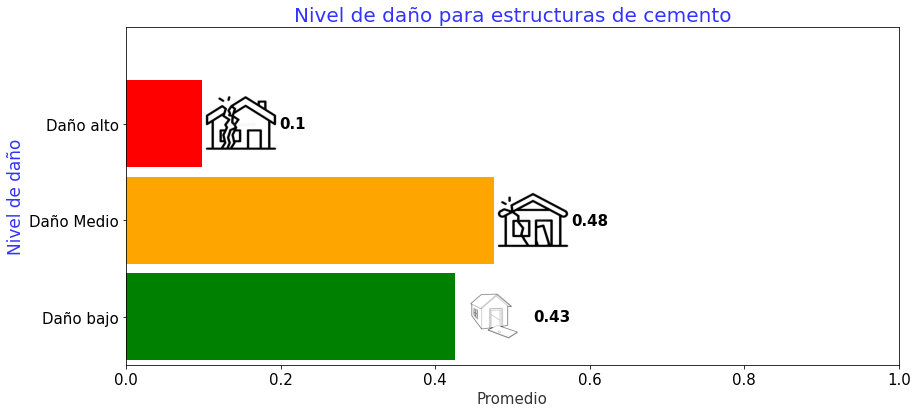

In [29]:
labels =['Daño bajo','Daño Medio','Daño alto']
colors = ['green','orange','red']
levels = ['Daño Bajo','Daño Medio','Daño Alto']
values = danio_cemento['promedio']

height = 0.9
v =plt.barh(y=labels, width=values, height=height, color=colors, align='center')
plt.title("Nivel de daño para estructuras de cemento", fontsize=20, color = 'blue',alpha = 0.8)
plt.ylabel("Nivel de daño", fontsize=17, color = 'blue', alpha = 0.8)
plt.xlabel("Promedio", fontsize=15, color = 'black', alpha = 0.8)

for i, (label, value) in enumerate(zip(labels, values)):
#    rut = (f'./drive/My Drive/Colab Notebooks/TP1/imagenes/damage{i+1}.jpg')
    rut = (dir_img+f'/damage{i+1}.jpg')
    img = cv2.imread(rut, cv2.IMREAD_COLOR)
    plt.imshow(img, extent=[value+0.1, value, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2, filterrad=10.0)

plt.xlim(0,1)
plt.ylim(-0.5, 3)
#plt.legend(v, levels)

for i, v in enumerate(values):
    izq = (i+1)*0.1
    if v == 0.0 :
      position = v - 10
      colors = 'red'
    else : 
      position = v 
      colors = 'black'
    plt.text(v+0.1,i - 0.05, str(round(v, 2)), color=colors, fontweight='bold')

plt.gcf().set_size_inches(13, 6)
plt.tight_layout()
plt.show()


**Estructuras de Adobe**
Son la mayoria de casos de estructuras mas dañadas. Este tipo de estructuras presentan en promedio daños de nivel más graves en comparación con otras estructuras. 

**Estructuras de Cemento (Concreto o ladrillos)**
En este tipo de estrutura se minimizan los daños graves contemplando más casos de daños medios. Por otro lado algunas de ellas tienen indices de daños bajos superiores en promedio a los de estructuras de adobe.

También es conveniente analizar si con el correr del tiempo cada uno de estos tipos mejoraron o mantuvieron siempre las mismas cualidades segun la antiguedad de los edificios.

In [30]:
#MERGE
values_labels = train_values.merge(train_labels, how = 'inner' , on='building_id')
adobe = values_labels[(values_labels['has_superstructure_adobe_mud'] == 1) & (values_labels['has_superstructure_mud_mortar_brick'] == 0) & (values_labels['has_superstructure_cement_mortar_brick'] == 0)]
cemento = values_labels[(values_labels['has_superstructure_adobe_mud'] == 0) & (values_labels['has_superstructure_mud_mortar_brick'] == 1) & (values_labels['has_superstructure_cement_mortar_brick'] == 1)]
total_adobe = adobe.shape[0]
total_cemento = cemento.shape[0]

In [31]:
adobe = adobe.loc[:,['plan_configuration']]
ag = {'Cantidad' : ('plan_configuration','count'),}
plan_adobe = adobe.groupby(['plan_configuration']).agg(**ag).reset_index()
plan_adobe['total'] = total_adobe
plan_adobe['promedio'] = plan_adobe.Cantidad / plan_adobe.total
plan_adobe

,plan_configuration,Cantidad,total,promedio
0,a,4,15358,0.000260
1,c,5,15358,0.000326
2,d,14607,15358,0.951100
3,f,2,15358,0.000130
4,m,1,15358,0.000065
5,n,1,15358,0.000065
6,o,2,15358,0.000130
7,q,485,15358,0.031580
8,s,28,15358,0.001823
9,u,223,15358,0.014520


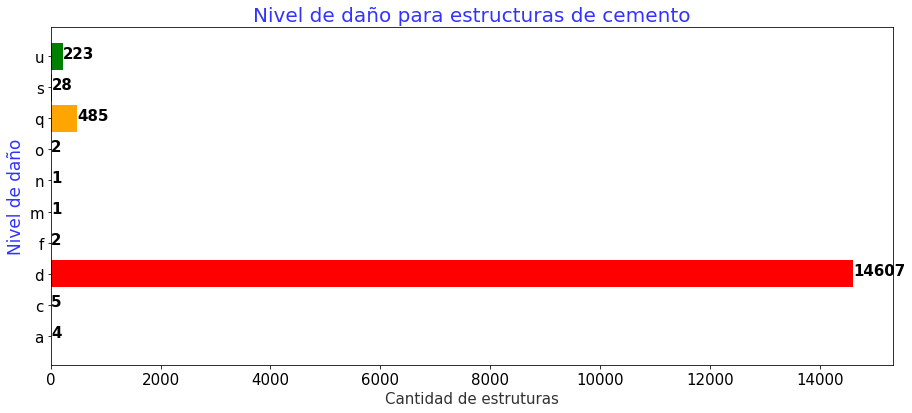

In [32]:
labels =plan_adobe['plan_configuration']
colors = ['green','orange','red']
levels = ['Daño Bajo','Daño Medio','Daño Alto']
values = plan_adobe['Cantidad']

height = 0.9
v =plt.barh(y=labels, width=values, height=height, color=colors, align='center')
plt.title("Nivel de daño para estructuras de cemento", fontsize=20, color = 'blue',alpha = 0.8)
plt.ylabel("Nivel de daño", fontsize=17, color = 'blue', alpha = 0.8)
plt.xlabel("Cantidad de estruturas", fontsize=15, color = 'black', alpha = 0.8)


#plt.xlim(0,1)
#plt.ylim(-0.5, 3)
#plt.legend(v, levels)

for i, v in enumerate(values):
    izq = (i+1)*0.1
    if v == 0.0 :
      position = v - 10
      colors = 'red'
    else : 
      position = v 
      colors = 'black'
    plt.text(v+0.1,i - 0.05, str(round(v, 2)), color=colors, fontweight='bold')

plt.gcf().set_size_inches(13, 6)
plt.tight_layout()
plt.show()

**Las estructuras antisismicas mas usadas** : u,q,d

Puedo analizar que tipos de materiales utilizan principalmente estos tipos como así también los cimientos principales.

In [33]:
#MERGE
list_t = ['u,q,d']
values_labels = train_values.merge(train_labels, how = 'inner' , on='building_id')
plan = values_labels.loc[values_labels['plan_configuration'].isin(['u','q','d'])]

#FILTRO COLUMNAS
col = list(values_labels.columns)
filtro1 = [col for col in values_labels if col.find('has_superstructure')>=0]
filtro1.append('plan_configuration')
materiales = values_labels.loc[:,filtro1]
traducciones = ['adobe_barro','barro_piedra','piedra','cemento_piedra','barro_ladrillos','cemento_ladrillos','madera','caña','concreto_reforzado','concreto_reforzado_diseñado','otros','plan']

def renombrar_columnas(df):
    i = 0
    for nombre in filtro1:
        newname = traducciones[i]
        i = i+1 
        df = df.rename(columns={nombre : newname}) #nombre[19:len(s)]
    return df

materiales = renombrar_columnas(materiales)
materiales.drop('otros', axis='columns', inplace=True)
ag = {'Cantidad_g1' : ('g1','sum'),
        'Cantidad_g2' : ('g2','sum'),
        'Cantidad_g3' : ('g3','sum'),
      }

plan = materiales.loc[materiales['plan'].isin(['u','q','d'])]
result = plan.groupby(['plan']).agg('sum').reset_index()
#result.drop(['piedra','cemento_piedra','caña','concreto_reforzado_diseñado'],axis = 'columns',inplace=True) 
result['total'] = result.iloc[:,1:7].sum(axis=1)
result['adobe_barro'] = result['adobe_barro'] * 100 / result['total'] 
result['barro_piedra'] = result['barro_piedra'] * 100 / result['total'] 
result['barro_ladrillos'] = result['barro_ladrillos'] * 100 / result['total'] 
result['cemento_ladrillos'] = result['cemento_ladrillos'] * 100 / result['total'] 
result['madera'] = result['madera'] * 100 / result['total'] 
result['concreto_reforzado'] = result['concreto_reforzado'] * 100 / result['total'] 
result['cemento_piedra'] = result['cemento_piedra'] * 100 / result['total']
result['piedra'] = result['piedra'] * 100 / result['total']
result['caña'] = result['caña'] * 100 / result['total']
result['concreto_reforzado_diseñado'] = result['concreto_reforzado_diseñado'] * 100 / result['total']

plan_d = result[(result['plan'] == 'd')]
plan_d.drop(['plan','total'],axis = 'columns',inplace=True) 
plan_d = plan_d.transpose().reset_index()
plan_d = plan_d.rename(index=str, columns={0: "Porcentaje", 'index':'Material'})

plan_q = result[(result['plan'] == 'q')]
plan_q.drop(['plan','total'],axis = 'columns',inplace=True) 
plan_q = plan_q.transpose().reset_index()
plan_q = plan_q.rename(index=str, columns={1: "Porcentaje", 'index':'Material'})

plan_u = result[(result['plan'] == 'u')]
plan_u.drop(['plan','total'],axis = 'columns',inplace=True) 
plan_u = plan_u.transpose().reset_index()
plan_u = plan_u.rename(index=str, columns={2: "Porcentaje", 'index':'Material'})

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


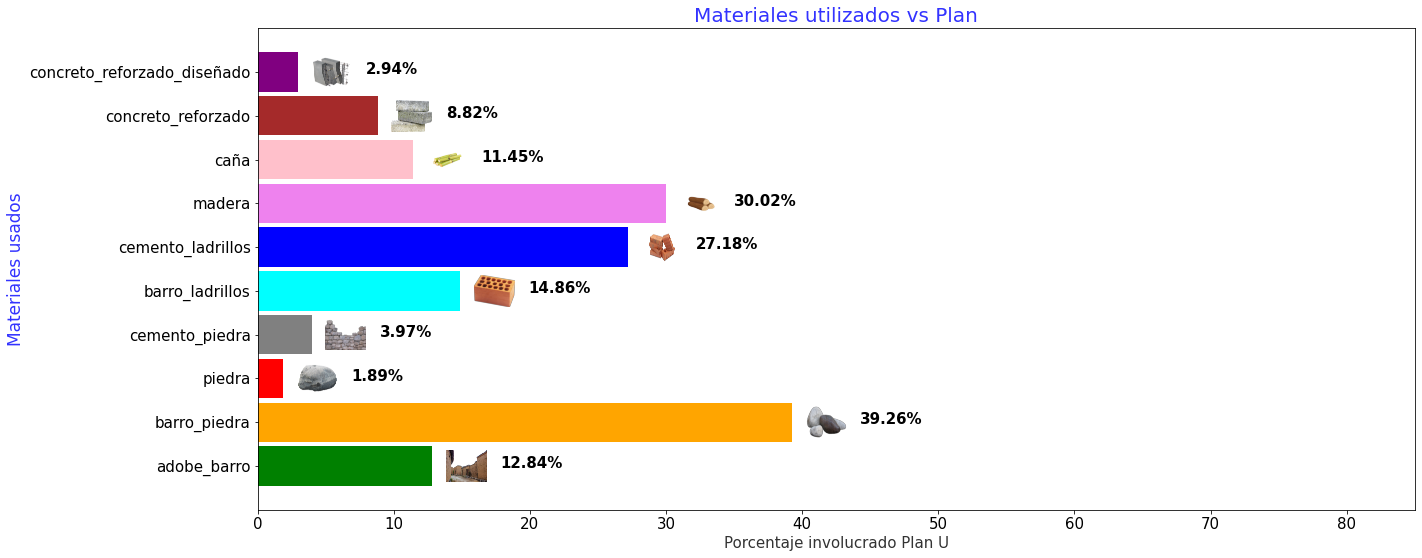

In [34]:

labels = plan_u['Material'].tolist()
colors = ['green','orange','red','grey','cyan','blue','violet','pink','Brown','purple']
levels = ['Daño Bajo','Daño Medio','Daño Alto']
values = plan_u['Porcentaje'].tolist()

height = 0.9
v =plt.barh(y=labels, width=values, height=height, color=colors, align='center')
plt.title("Materiales utilizados vs Plan", fontsize=20, color = 'blue',alpha = 0.8)
plt.ylabel("Materiales usados", fontsize=17, color = 'blue', alpha = 0.8)
plt.xlabel("Porcentaje involucrado Plan U", fontsize=15, color = 'black', alpha = 0.8)

tip = ['adobe_barro','barro_piedra','piedra','cemento_piedra','barro_ladrillos','cemento_ladrillos','madera','caña','concreto_reforzado','concreto_reforzado_diseño']
for i, (label, value) in enumerate(zip(labels, values)):
#   rut = (f'./drive/My Drive/Colab Notebooks/TP1/imagenes/materiales/iconos/{tip[i]}.png')
   rut = (dir_img+f'/materiales/iconos/{tip[i]}.png')
   img = mpimg.imread(rut)
   plt.imshow(img, extent=[value + 1, value +4, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2, filterrad=10.0)


plt.xlim(0, 85)
plt.ylim(-1, 10)
#plt.legend(v, labels)

for i, v in enumerate(values):
    izq = 10 + (i+1)*1
    if v == 0.0 :
      colors = 'red'
    else : 
      colors = 'black'
    if v > 75 : position =3
    else : position = 5
    plt.text(v + position,i - .05, str(round(v, 2)) + '%', color=colors, fontweight='bold')

plt.gcf().set_size_inches(20, 8)
plt.tight_layout()
plt.show()

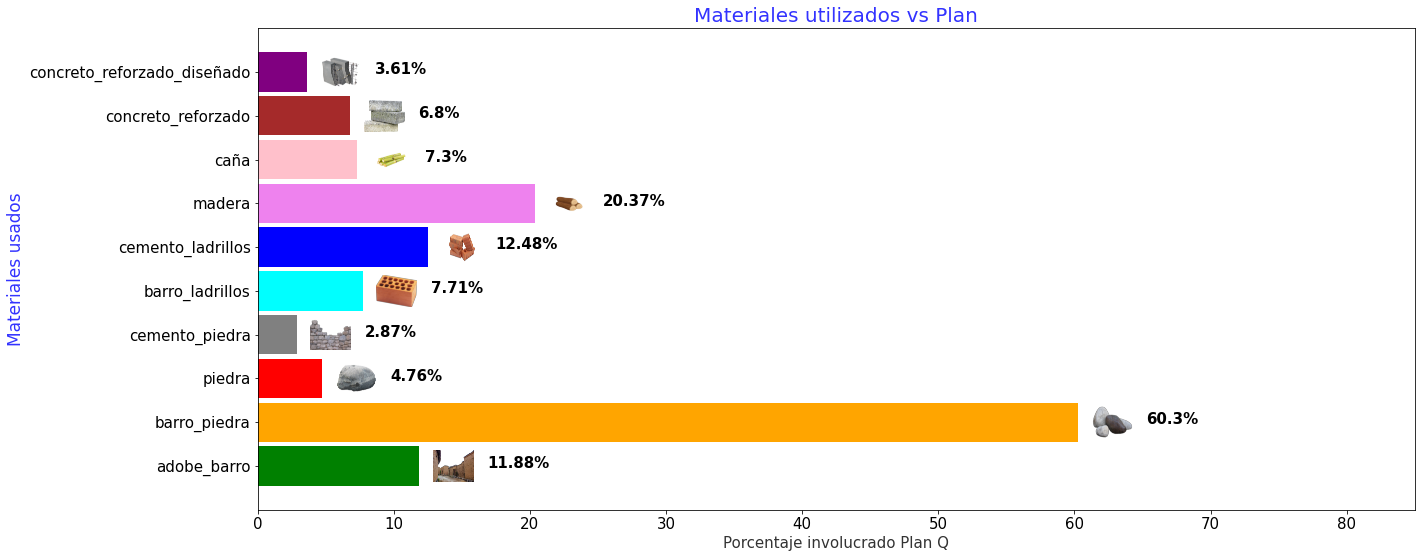

In [35]:

labels = plan_q['Material'].tolist()
colors = ['green','orange','red','grey','cyan','blue','violet','pink','Brown','purple']
levels = ['Daño Bajo','Daño Medio','Daño Alto']
values = plan_q['Porcentaje'].tolist()

height = 0.9
v =plt.barh(y=labels, width=values, height=height, color=colors, align='center')
plt.title("Materiales utilizados vs Plan", fontsize=20, color = 'blue',alpha = 0.8)
plt.ylabel("Materiales usados", fontsize=17, color = 'blue', alpha = 0.8)
plt.xlabel("Porcentaje involucrado Plan Q", fontsize=15, color = 'black', alpha = 0.8)

tip = ['adobe_barro','barro_piedra','piedra','cemento_piedra','barro_ladrillos','cemento_ladrillos','madera','caña','concreto_reforzado','concreto_reforzado_diseño']
for i, (label, value) in enumerate(zip(labels, values)):
#   rut = (f'./drive/My Drive/Colab Notebooks/TP1/imagenes/materiales/iconos/{tip[i]}.png')
   rut = (dir_img+f'/materiales/iconos/{tip[i]}.png')
   img = mpimg.imread(rut)
   plt.imshow(img, extent=[value + 1, value +4, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2, filterrad=10.0)


plt.xlim(0, 85)
plt.ylim(-1, 10)
#plt.legend(v, labels)

for i, v in enumerate(values):
    izq = 10 + (i+1)*1
    if v == 0.0 :
      colors = 'red'
    else : 
      colors = 'black'
    if v > 75 : position =3
    else : position = 5
    plt.text(v + position,i - .05, str(round(v, 2)) + '%', color=colors, fontweight='bold')

plt.gcf().set_size_inches(20, 8)
plt.tight_layout()
plt.show()

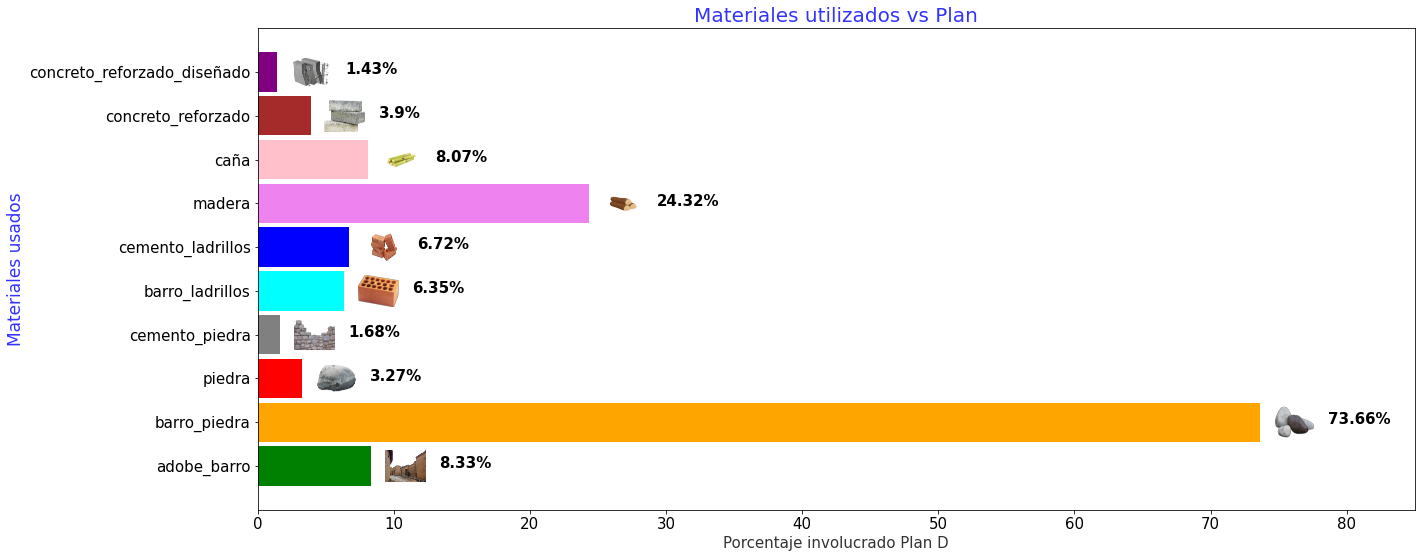

In [36]:
labels = plan_d['Material'].tolist()
colors = ['green','orange','red','grey','cyan','blue','violet','pink','Brown','purple']
levels = ['Daño Bajo','Daño Medio','Daño Alto']
values = plan_d['Porcentaje'].tolist()

height = 0.9
v =plt.barh(y=labels, width=values, height=height, color=colors, align='center')
plt.title("Materiales utilizados vs Plan", fontsize=20, color = 'blue',alpha = 0.8)
plt.ylabel("Materiales usados", fontsize=17, color = 'blue', alpha = 0.8)
plt.xlabel("Porcentaje involucrado Plan D", fontsize=15, color = 'black', alpha = 0.8)

tip = ['adobe_barro','barro_piedra','piedra','cemento_piedra','barro_ladrillos','cemento_ladrillos','madera','caña','concreto_reforzado','concreto_reforzado_diseño']
for i, (label, value) in enumerate(zip(labels, values)):
#   rut = (f'./drive/My Drive/Colab Notebooks/TP1/imagenes/materiales/iconos/{tip[i]}.png')
   rut = (dir_img+f'/materiales/iconos/{tip[i]}.png')
   img = mpimg.imread(rut)
   plt.imshow(img, extent=[value + 1, value +4, i - height / 2.5, i + height / 2.5], aspect='auto', zorder=2, filterrad=10.0)


plt.xlim(0, 85)
plt.ylim(-1, 10)
#plt.legend(v, labels)

for i, v in enumerate(values):
    izq = 10 + (i+1)*1
    if v == 0.0 :
      colors = 'red'
    else : 
      colors = 'black'
    if v > 75 : position =3
    else : position = 5
    plt.text(v + position,i - .05, str(round(v, 2)) + '%', color=colors, fontweight='bold')

plt.gcf().set_size_inches(20, 8)
plt.tight_layout()
plt.show()

**En los planes mas utilizados (u,q,d)**

Los porcentajes de materiales utilizados son similares entre D y Q.

Porporcion de concreto iguales en Planes Q y U.

El material más utilizado en todos los casos es al igual que en terminosgenerales el barro con piedra. 

**PLAN D:**

Mas utilizado: barro con piedra.

Menos utilizado:  cemento_piedra.

Del grupo es el que  menos concreto utiliza.

**PLAN Q**

Más utilizado:  barro con piedra .

Menos utilizado: cemento_piedra.

**Plan U**

Más utilizado: Madera y barro con piedra.

Menos utilizado: Piedra.

Del grupo es el que  mas utiliza madera y ladrillos.

**Nivel de precariedad** 

Considerando elementos previamente analizados como concreto vs adobe:
**PLan U > PLan Q > Plan D**

# Nueva carga con cambio de tipos


# Análisis de train_values.csv

In [37]:
# Carga de train_values.csv
df = pd.read_csv(dir_values)

In [38]:
memoria = df.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 176.95 MiB


No hay columnas con datos nulos.

Se puede reallizar un cambio de tipo a las columnas para ajustar el uso de memoria.

### Columnas numéricas

`building_id`: \[4, 1052934\] $\rightarrow$ int32

`geo_level_1_id`: \[0, 30\] $\rightarrow$ int8

`geo_level_2_id`: \[0, 1427\] $\rightarrow$ int16

`geo_level_3_id`: \[0, 12567\] $\rightarrow$ int16

`count_floors_pre_eq`: \[0, 9\] $\rightarrow$ int8

`age`: \[0, 995\] $\rightarrow$ int16

`area_percentage`: \[0, 100\] $\rightarrow$ int8

`height_percentage`: \[2, 32\] $\rightarrow$ int8

`count_families`: \[0, 9\] $\rightarrow$ int8

In [39]:
df['building_id'] = df['building_id'].astype('int32')
df['geo_level_1_id'] = df['geo_level_1_id'].astype('int8')
df['geo_level_2_id'] = df['geo_level_2_id'].astype('int16')
df['geo_level_3_id'] = df['geo_level_3_id'].astype('int16')
df['count_floors_pre_eq'] = df['count_floors_pre_eq'].astype('int8')
df['age'] = df['age'].astype('int16')
df['area_percentage'] = df['area_percentage'].astype('int8')
df['height_percentage'] = df['height_percentage'].astype('int8')
df['count_families'] = df['count_families'].astype('int8')

In [40]:
memoria = df.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 162.79 MiB


### Columnas booleanas

`has_superstructure_adobe_mud`, `has_superstructure_mud_mortar_stone`, `has_superstructure_stone_flag`, 
`has_superstructure_cement_mortar_stone`, `has_superstructure_mud_mortar_brick`, `has_superstructure_cement_mortar_brick`, `has_superstructure_timber`, `has_superstructure_bamboo`, `has_superstructure_rc_non_engineered`, `has_superstructure_rc_engineered`, `has_superstructure_other`, `has_secondary_use`, `has_secondary_use_agriculture`, `has_secondary_use_hotel`, `has_secondary_use_rental`, `has_secondary_use_institution`, `has_secondary_use_school`, `has_secondary_use_industry`, `has_secondary_use_health_post`, `has_secondary_use_gov_office`, `has_secondary_use_use_police`, `has_secondary_use_other`

Todas tienen valores \[0, 1\] $\Longrightarrow$ bool

In [41]:
df['has_superstructure_adobe_mud'] = df['has_superstructure_adobe_mud'].astype('bool')
df['has_superstructure_mud_mortar_stone'] = df['has_superstructure_mud_mortar_stone'].astype('bool')
df['has_superstructure_stone_flag'] = df['has_superstructure_stone_flag'].astype('bool')
df['has_superstructure_cement_mortar_stone'] = df['has_superstructure_cement_mortar_stone'].astype('bool')
df['has_superstructure_mud_mortar_brick'] = df['has_superstructure_mud_mortar_brick'].astype('bool')
df['has_superstructure_cement_mortar_brick'] = df['has_superstructure_cement_mortar_brick'].astype('bool')
df['has_superstructure_timber'] = df['has_superstructure_timber'].astype('bool')
df['has_superstructure_bamboo'] = df['has_superstructure_bamboo'].astype('bool')
df['has_superstructure_rc_non_engineered'] = df['has_superstructure_rc_non_engineered'].astype('bool')
df['has_superstructure_rc_engineered'] = df['has_superstructure_rc_engineered'].astype('bool')
df['has_superstructure_other'] = df['has_superstructure_other'].astype('bool')
df['has_secondary_use'] = df['has_secondary_use'].astype('bool')
df['has_secondary_use_agriculture'] = df['has_secondary_use_agriculture'].astype('bool')
df['has_secondary_use_hotel'] = df['has_secondary_use_hotel'].astype('bool')
df['has_secondary_use_rental'] = df['has_secondary_use_rental'].astype('bool')
df['has_secondary_use_institution'] = df['has_secondary_use_institution'].astype('bool')
df['has_secondary_use_school'] = df['has_secondary_use_school'].astype('bool')
df['has_secondary_use_industry'] = df['has_secondary_use_industry'].astype('bool')
df['has_secondary_use_health_post'] = df['has_secondary_use_health_post'].astype('bool')
df['has_secondary_use_gov_office'] = df['has_secondary_use_gov_office'].astype('bool')
df['has_secondary_use_use_police'] = df['has_secondary_use_use_police'].astype('bool')
df['has_secondary_use_other'] = df['has_secondary_use_other'].astype('bool')

In [42]:
memoria = df.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 124.51 MiB


### Columnas Categóricas

`land_surface_condition`, `foundation_type`, `roof_type`, `ground_floor_type`, `other_floor_type`, `position`, `plan_configuration`, `legal_ownership_status`

In [43]:
df['land_surface_condition'] = df['land_surface_condition'].astype('category')
df['foundation_type'] = df['foundation_type'].astype('category')
df['roof_type'] = df['roof_type'].astype('category')
df['ground_floor_type'] = df['ground_floor_type'].astype('category')
df['other_floor_type'] = df['other_floor_type'].astype('category')
df['position'] = df['position'].astype('category')
df['plan_configuration'] = df['plan_configuration'].astype('category')
df['legal_ownership_status'] = df['legal_ownership_status'].astype('category')

In [44]:
memoria = df.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 11.19 MiB


# Análisis train_labels.csv

In [45]:
# Carga de train_labels.csv
df_labels = pd.read_csv(dir_labels)

In [46]:
df_labels['damage_grade'].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

Los labels tienen los valores 1, 2 y 3.

In [47]:
memoria = df_labels.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 3.98 MiB


In [48]:
df_labels['damage_grade'] = df_labels['damage_grade'].astype('int8')

In [49]:
memoria = df_labels.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 2.24 MiB


# Join de values con labels

In [50]:
df = df.merge(df_labels, on='building_id', how='inner')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int32   
 1   geo_level_1_id                          260601 non-null  int8    
 2   geo_level_2_id                          260601 non-null  int16   
 3   geo_level_3_id                          260601 non-null  int16   
 4   count_floors_pre_eq                     260601 non-null  int8    
 5   age                                     260601 non-null  int16   
 6   area_percentage                         260601 non-null  int8    
 7   height_percentage                       260601 non-null  int8    
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

Las filas mantienen el mismo número, 260601, por lo que los `building_id` tenían su correpondiente fila de labels.

# Análisis de grado de daños por cantidad de pisos

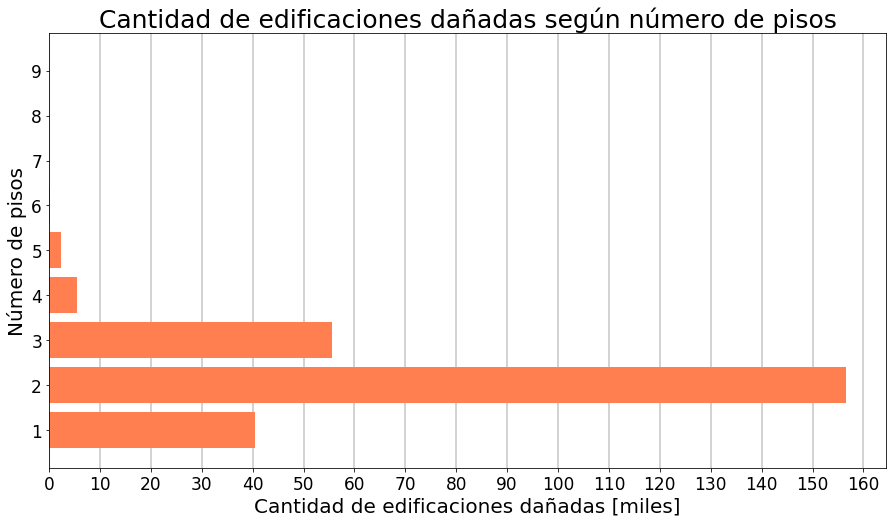

In [52]:
fig,ax = plt.subplots(figsize=(15,8))
pisos = df\
  .groupby('count_floors_pre_eq').agg({'damage_grade':'count'}).reset_index()\
  .rename(columns={'damage_grade':'quantity'})['count_floors_pre_eq']
cantidad = df\
  .groupby('count_floors_pre_eq').agg({'damage_grade':'count'}).reset_index()\
  .rename(columns={'damage_grade':'quantity'})['quantity']

plot = ax.barh(y=pisos, width=cantidad, color='coral')

title='''Cantidad de edificaciones dañadas según número de pisos'''
plt.title(label=title, fontsize=25)
plt.xlabel('Cantidad de edificaciones dañadas [miles]', fontsize=20)
plt.ylabel('Número de pisos', fontsize=20)
plt.xticks(np.arange(0, 160001, step=10000), fontsize=17)
plt.yticks(np.arange(1, 10, step=1), fontsize=17)

# Función para elegir unidades de miles millón
def mil(x, pos):
  return '{:,.0f}'.format(x*1e-3)

plt.gca().xaxis.set_major_formatter(FuncFormatter(mil))
plt.grid(axis='x', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

#plt.show()

Se ve que hay muchos edificios de más de un piso que registran daños.

# Mapas de calor: Cantidad de edificaciones con daños (low, medium, high) para los distintos geo_level_x_id

In [53]:
# Se hace una copia al crear el nuevo DataFrame
columnas = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'damage_grade'] 
df_geo_levels_damage = df\
  .loc[:, columnas]\
  .set_index('damage_grade').copy()

In [54]:
# Creación de Dataframe para bins por geo_level_x_id

df_geo_levels_damage = pd.DataFrame()

bins = np.arange(0, 31, step=2)
df_geo_levels_damage['geo_level_1_id_binned'] = pd.cut(df['geo_level_1_id'], bins)

bins = np.arange(0, 1441, step=96)
df_geo_levels_damage['geo_level_2_id_binned'] = pd.cut(df['geo_level_2_id'], bins)

bins = np.arange(0, 12571, step=838)
df_geo_levels_damage['geo_level_3_id_binned'] = pd.cut(df['geo_level_3_id'], bins)

df_geo_levels_damage['damage_grade'] = df['damage_grade']

In [55]:
df_geo_levels_damage.head(3)

,geo_level_1_id_binned,geo_level_2_id_binned,geo_level_3_id_binned,damage_grade
0,"(4, 6]","(480, 576]","(11732, 12570]",3
1,"(6, 8]","(864, 960]","(2514, 3352]",2
2,"(20, 22]","(288, 384]","(8380, 9218]",3


Con este nuevo DataFrame se van a calcular las cantidades necesarias.

## Cantidad de edificaciones con daños (low, medium, high) para `geo_level_1_id`

In [56]:
# Cantidad de edificaciones dañadas para geo_level_id_1 contadas por nivel de daño
df_geo_damage_geo_1 = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 1, 'geo_level_1_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_1_id', 'geo_level_1_id_binned':'cant_low_dmg'})\
  .sort_values(by='geo_level_1_id', ascending=False)

df_aux = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 2, 'geo_level_1_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_1_id', 'geo_level_1_id_binned':'cant_med_dmg'})\
  .sort_values(by='geo_level_1_id', ascending=False)

df_geo_damage_geo_1 = df_geo_damage_geo_1.merge(df_aux, on='geo_level_1_id', how='outer')

df_aux = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 3, 'geo_level_1_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_1_id', 'geo_level_1_id_binned':'cant_hig_dmg'})\
  .sort_values(by='geo_level_1_id', ascending=False)

df_geo_damage_geo_1 = df_geo_damage_geo_1.merge(df_aux, on='geo_level_1_id', how='outer')
df_geo_damage_geo_1.set_index('geo_level_1_id', inplace=True)

In [57]:
# Cantidad total de edificaciones de geo_level_1_id que registran algún daño 
df_geo_damage_geo_1.sum()

cant_low_dmg     24787
cant_med_dmg    145184
cant_hig_dmg     86619
dtype: int64

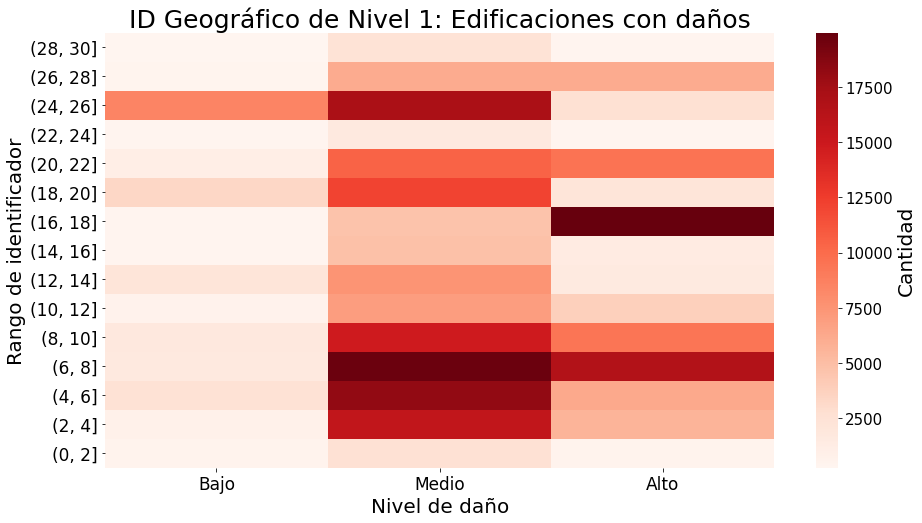

In [58]:
plt.figure(figsize=(15,8))
plot = sns.heatmap(df_geo_damage_geo_1, cmap='Reds', \
                   cbar_kws={'label': 'Cantidad'}, \
                   xticklabels=['Bajo', 'Medio', 'Alto'])

title='''ID Geográfico de Nivel 1: Edificaciones con daños'''
plt.title(label=title, fontsize=25)
plt.xlabel('Nivel de daño', fontsize=20)
plt.ylabel('Rango de identificador', fontsize=20)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
# Tamaño de fuente del rótulo de la barra de colores
plot.figure.axes[-1].yaxis.label.set_size(20)
plt.show()

### Notables

In [59]:
df_geo_damage_geo_1['cant_low_dmg'].nlargest(1)

geo_level_1_id
(24, 26]    8496
Name: cant_low_dmg, dtype: int64

In [60]:
df_geo_damage_geo_1['cant_med_dmg'].nlargest(5)

geo_level_1_id
(6, 8]      19786
(4, 6]      18236
(24, 26]    17029
(2, 4]      15714
(8, 10]     14840
Name: cant_med_dmg, dtype: int64

In [61]:
df_geo_damage_geo_1['cant_hig_dmg'].nlargest(2)

geo_level_1_id
(16, 18]    19946
(6, 8]      16601
Name: cant_hig_dmg, dtype: int64

## Cantidad de edificaciones con daños (low, medium, high) para `geo_level_2_id`

In [62]:
# Cantidad de edificaciones dañadas para geolevel_id_2 contadas por nivel de daño
df_geo_damage_geo_2 = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 1, 'geo_level_2_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_2_id', 'geo_level_2_id_binned':'cant_low_dmg'})\
  .sort_values(by='geo_level_2_id', ascending=False)

df_aux = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 2, 'geo_level_2_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_2_id', 'geo_level_2_id_binned':'cant_med_dmg'})\
  .sort_values(by='geo_level_2_id', ascending=False)

df_geo_damage_geo_2 = df_geo_damage_geo_2.merge(df_aux, on='geo_level_2_id', how='outer')

df_aux = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 3, 'geo_level_2_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_2_id', 'geo_level_2_id_binned':'cant_hig_dmg'})\
  .sort_values(by='geo_level_2_id', ascending=False)

df_geo_damage_geo_2 = df_geo_damage_geo_2.merge(df_aux, on='geo_level_2_id', how='outer')
df_geo_damage_geo_2.set_index('geo_level_2_id', inplace=True)

In [63]:
# Cantidad total de edificaciones de geo_level_2_id que registran algún daño 
df_geo_damage_geo_2.sum()

cant_low_dmg     25124
cant_med_dmg    148250
cant_hig_dmg     87189
dtype: int64

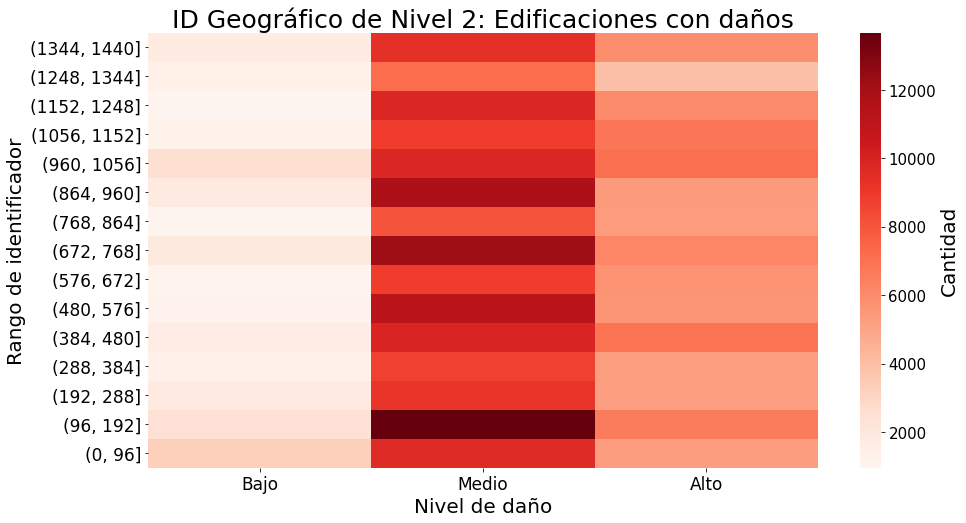

In [64]:
plt.figure(figsize=(15,8))
plot = sns.heatmap(df_geo_damage_geo_2, cmap='Reds', \
                   cbar_kws={'label': 'Cantidad'}, \
                   xticklabels=['Bajo', 'Medio', 'Alto'])

title='''ID Geográfico de Nivel 2: Edificaciones con daños'''
plt.title(label=title, fontsize=25)
plt.xlabel('Nivel de daño', fontsize=20)
plt.ylabel('Rango de identificador', fontsize=20)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
# Tamaño de fuente del rótulo de la barra de colores
plot.figure.axes[-1].yaxis.label.set_size(20)
plt.show()

##Notables

In [65]:
df_geo_damage_geo_2['cant_low_dmg'].nsmallest(3)

geo_level_2_id
(768, 864]       952
(1152, 1248]     965
(576, 672]      1123
Name: cant_low_dmg, dtype: int64

In [66]:
df_geo_damage_geo_2.sum(axis=1).sort_values()

geo_level_2_id
(1248, 1344]    12502
(768, 864]      14381
(288, 384]      15263
(576, 672]      15598
(192, 288]      16186
(1152, 1248]    16755
(1056, 1152]    16935
(1344, 1440]    16969
(480, 576]      18045
(0, 96]         18209
(384, 480]      18386
(864, 960]      18866
(960, 1056]     19485
(672, 768]      20236
(96, 192]       22747
dtype: int64

El rango (1248, 1344] es el que tiene menor cantidad de daños registrados.

## Cantidad de edificaciones con daños (low, medium, high) para `geo_level_3_id`

In [67]:
# Cantidad de edificaciones dañadas para geolevel_id_3 contadas por nivel de daño
df_geo_damage_geo_3 = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 1, 'geo_level_3_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_3_id', 'geo_level_3_id_binned':'cant_low_dmg'})\
  .sort_values(by='geo_level_3_id', ascending=False)

df_aux = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 2, 'geo_level_3_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_3_id', 'geo_level_3_id_binned':'cant_med_dmg'})\
  .sort_values(by='geo_level_3_id', ascending=False)

df_geo_damage_geo_3 = df_geo_damage_geo_3.merge(df_aux, on='geo_level_3_id', how='outer')

df_aux = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 3, 'geo_level_3_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_3_id', 'geo_level_3_id_binned':'cant_hig_dmg'})\
  .sort_values(by='geo_level_3_id', ascending=False)

df_geo_damage_geo_3 = df_geo_damage_geo_3.merge(df_aux, on='geo_level_3_id', how='outer')
df_geo_damage_geo_3.set_index('geo_level_3_id', inplace=True)

In [68]:
# Cantidad total de edificaciones de geo_level_3_id que registran algún daño 
df_geo_damage_geo_3.sum()

cant_low_dmg     25124
cant_med_dmg    148259
cant_hig_dmg     87216
dtype: int64

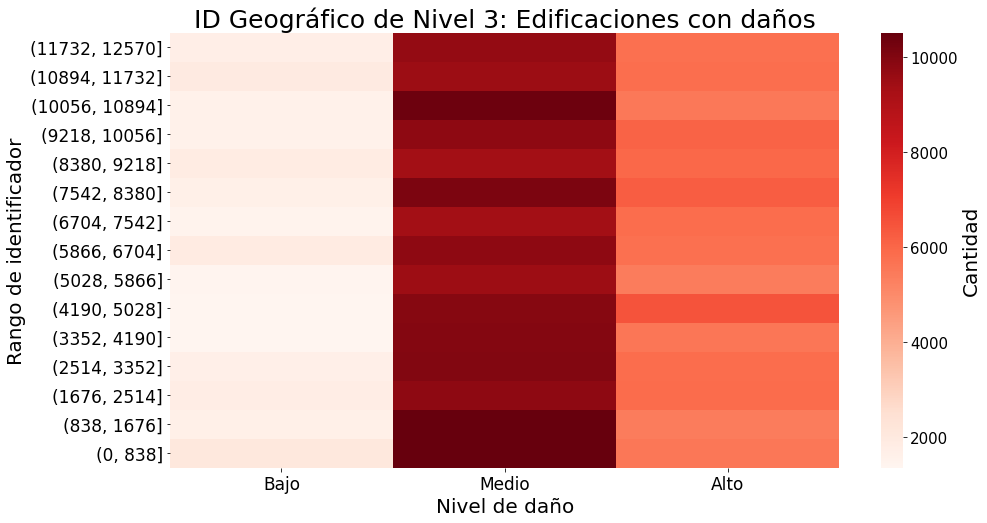

In [69]:
plt.figure(figsize=(15,8))
plot = sns.heatmap(df_geo_damage_geo_3, cmap='Reds', \
                   cbar_kws={'label': 'Cantidad'}, \
                   xticklabels=['Bajo', 'Medio', 'Alto'])

title='''ID Geográfico de Nivel 3: Edificaciones con daños'''
plt.title(label=title, fontsize=25)
plt.xlabel('Nivel de daño', fontsize=20)
plt.ylabel('Rango de identificador', fontsize=20)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
# Tamaño de fuente del rótulo de la barra de colores
plot.figure.axes[-1].yaxis.label.set_size(20)
plt.show()

In [70]:
df_geo_damage_geo_3['cant_med_dmg'].nlargest(5)

geo_level_3_id
(0, 838]          10518
(838, 1676]       10499
(10056, 10894]    10392
(7542, 8380]      10118
(2514, 3352]       9983
Name: cant_med_dmg, dtype: int64

Ya que la distribución de casos parece tener cierta uniformidad tiene sentido analizar algunos estadísticos.

In [71]:
i=1
for col in df_geo_damage_geo_3.columns:
  print('Nivel Geográfico', i, ':')
  print('\tcant\t', df_geo_damage_geo_3[col].sum())
  print('\tmedia\t', np.round(df_geo_damage_geo_3[col].mean(), 0))
  print('\tmediana\t', df_geo_damage_geo_3[col].median())
  print('\tdesvío\t', np.round(df_geo_damage_geo_3[col].std(), 0))
  i = i+1

Nivel Geográfico 1 :
	cant	 25124
	media	 1675.0
	mediana	 1665.0
	desvío	 220.0
Nivel Geográfico 2 :
	cant	 148259
	media	 9884.0
	mediana	 9799.0
	desvío	 371.0
Nivel Geográfico 3 :
	cant	 87216
	media	 5814.0
	mediana	 5802.0
	desvío	 301.0


### Conclusión

En las tres regiones geográficas se ve que la ocurrencia de poco daño es mínima comparada con los otros tipos de daño. Las edificaciones con daño medio dominan en todas las regiones, especialmente en la región geográfica de nivel 3.

# Daños por condición de superficie

## Dataframe de datos pertinentes

In [72]:
df_dmg_by_surf_cond = df\
  .loc[df['damage_grade'] == 1, 'land_surface_condition']\
  .value_counts().to_frame().reset_index()\
  .rename(columns={'index':'surf_cond', \
                   'land_surface_condition':'cant_low_dmg'})

df_dmg_by_surf_cond

,surf_cond,cant_low_dmg
0,t,21966
1,n,2556
2,o,602


In [73]:
df_dmg_by_surf_cond = df_dmg_by_surf_cond\
  .merge(df\
         .loc[df['damage_grade'] == 2, 'land_surface_condition']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'surf_cond', \
                          'land_surface_condition':'cant_med_dmg'}), \
         on = 'surf_cond', how='left')
  
df_dmg_by_surf_cond

,surf_cond,cant_low_dmg,cant_med_dmg
0,t,21966,122067
1,n,2556,21484
2,o,602,4708


In [74]:
df_dmg_by_surf_cond = df_dmg_by_surf_cond\
  .merge(df\
         .loc[df['damage_grade'] == 3, 'land_surface_condition']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'surf_cond', \
                          'land_surface_condition':'cant_hig_dmg'}), \
         on = 'surf_cond', how='left')
  
df_dmg_by_surf_cond

,surf_cond,cant_low_dmg,cant_med_dmg,cant_hig_dmg
0,t,21966,122067,72724
1,n,2556,21484,11488
2,o,602,4708,3006


## Se añaden proporciones

In [75]:
# Suma de casos
df_dmg_by_surf_cond['total'] = df_dmg_by_surf_cond[['cant_low_dmg', 'cant_med_dmg', 'cant_hig_dmg']].sum(axis=1)
# Cálculo de proporciones, en %
df_dmg_by_surf_cond['p_low'] = np.round(df_dmg_by_surf_cond['cant_low_dmg']/df_dmg_by_surf_cond['total']*100, 1)
df_dmg_by_surf_cond['p_med'] = np.round(df_dmg_by_surf_cond['cant_med_dmg']/df_dmg_by_surf_cond['total']*100, 1)
df_dmg_by_surf_cond['p_hig'] = np.round(df_dmg_by_surf_cond['cant_hig_dmg']/df_dmg_by_surf_cond['total']*100, 1)

df_dmg_by_surf_cond

,surf_cond,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,t,21966,122067,72724,216757,10.1,56.3,33.6
1,n,2556,21484,11488,35528,7.2,60.5,32.3
2,o,602,4708,3006,8316,7.2,56.6,36.1


## Plot

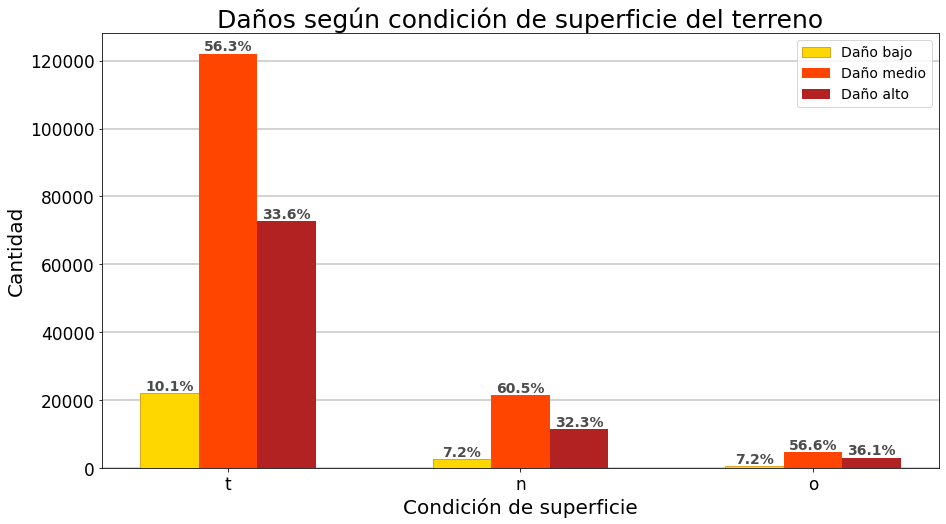

In [76]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_surf_cond['surf_cond']
x = np.arange(len(labels))
width = 0.2

bar1 = ax.bar(x - width, df_dmg_by_surf_cond['cant_low_dmg'], width,\
              label='Daño bajo', color='gold', edgecolor='goldenrod')
bar2 = ax.bar(x , df_dmg_by_surf_cond['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_surf_cond['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

ax.set_title('Daños según condición de superficie del terreno', fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Condición de superficie', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
# bar_label es nuevo hay que actualizar matplotlib
ax.bar_label(bar1, labels=df_dmg_by_surf_cond['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_surf_cond['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_surf_cond['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

# Daños por tipo de cimientos

## Dataframe de datos pertinentes

In [77]:
df_dmg_by_foun_type = df\
  .loc[df['damage_grade'] == 1, 'foundation_type']\
  .value_counts().to_frame().reset_index()\
  .rename(columns={'index':'foun_type', \
                   'foundation_type':'cant_low_dmg'})

df_dmg_by_foun_type

,foun_type,cant_low_dmg
0,r,10720
1,i,6004
2,w,4353
3,u,3689
4,h,358


In [78]:
df_dmg_by_foun_type = df_dmg_by_foun_type\
  .merge(df\
         .loc[df['damage_grade'] == 2, 'foundation_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'foun_type', \
                          'foundation_type':'cant_med_dmg'}), \
         on = 'foun_type', how='left')
  
df_dmg_by_foun_type

,foun_type,cant_low_dmg,cant_med_dmg
0,r,10720,125515
1,i,6004,4354
2,w,4353,9270
3,u,3689,8541
4,h,358,579


In [79]:
df_dmg_by_foun_type = df_dmg_by_foun_type\
  .merge(df\
         .loc[df['damage_grade'] == 3, 'foundation_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'foun_type', \
                          'foundation_type':'cant_hig_dmg'}), \
         on = 'foun_type', how='left')
  
df_dmg_by_foun_type

,foun_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg
0,r,10720,125515,82961
1,i,6004,4354,221
2,w,4353,9270,1495
3,u,3689,8541,2030
4,h,358,579,511


## Se añaden proporciones

In [80]:
# Suma de casos
df_dmg_by_foun_type['total'] = df_dmg_by_foun_type[['cant_low_dmg', 'cant_med_dmg', 'cant_hig_dmg']].sum(axis=1)
# Cálculo de proporciones, en %
df_dmg_by_foun_type['p_low'] = np.round(df_dmg_by_foun_type['cant_low_dmg']/df_dmg_by_foun_type['total']*100, 1)
df_dmg_by_foun_type['p_med'] = np.round(df_dmg_by_foun_type['cant_med_dmg']/df_dmg_by_foun_type['total']*100, 1)
df_dmg_by_foun_type['p_hig'] = np.round(df_dmg_by_foun_type['cant_hig_dmg']/df_dmg_by_foun_type['total']*100, 1)

df_dmg_by_foun_type

,foun_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,r,10720,125515,82961,219196,4.9,57.3,37.8
1,i,6004,4354,221,10579,56.8,41.2,2.1
2,w,4353,9270,1495,15118,28.8,61.3,9.9
3,u,3689,8541,2030,14260,25.9,59.9,14.2
4,h,358,579,511,1448,24.7,40.0,35.3


## Cimientos tipo `r`

In [81]:
df_dmg_by_foun_type_a = df_dmg_by_foun_type.drop([1, 2, 3, 4])
df_dmg_by_foun_type_a

,foun_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,r,10720,125515,82961,219196,4.9,57.3,37.8


## Plot a

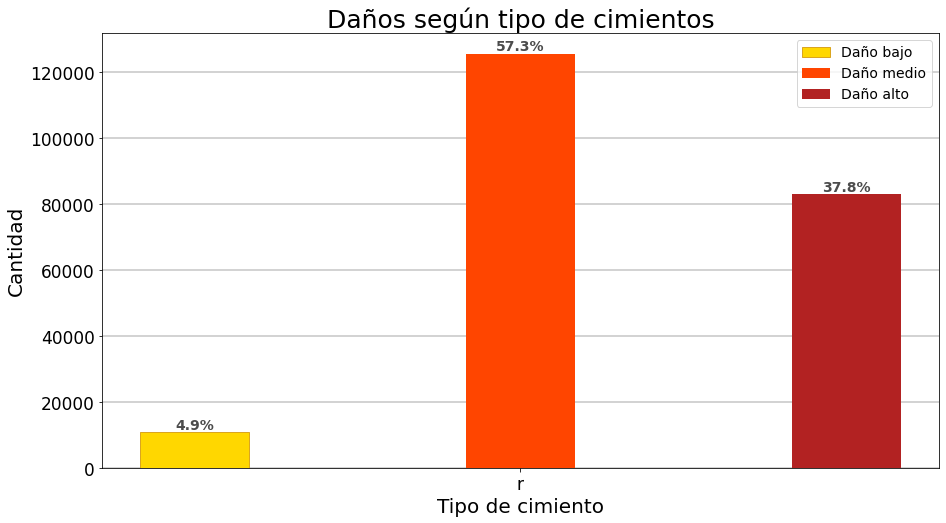

In [82]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_foun_type_a['foun_type']
x = np.arange(len(labels))
width = 0.1

bar1 = ax.bar(x - 3*width, df_dmg_by_foun_type_a['cant_low_dmg'], width,\
              label='Daño bajo', color='gold', edgecolor='goldenrod')
bar2 = ax.bar(x , df_dmg_by_foun_type_a['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + 3*width, df_dmg_by_foun_type_a['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

ax.set_title('Daños según tipo de cimientos', fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Tipo de cimiento', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_foun_type_a['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_foun_type_a['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_foun_type_a['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

## Dataframe sin cimiento `r`

In [83]:
df_dmg_by_foun_type_b = df_dmg_by_foun_type.drop(0)
df_dmg_by_foun_type_b

,foun_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
1,i,6004,4354,221,10579,56.8,41.2,2.1
2,w,4353,9270,1495,15118,28.8,61.3,9.9
3,u,3689,8541,2030,14260,25.9,59.9,14.2
4,h,358,579,511,1448,24.7,40.0,35.3


## Plot b

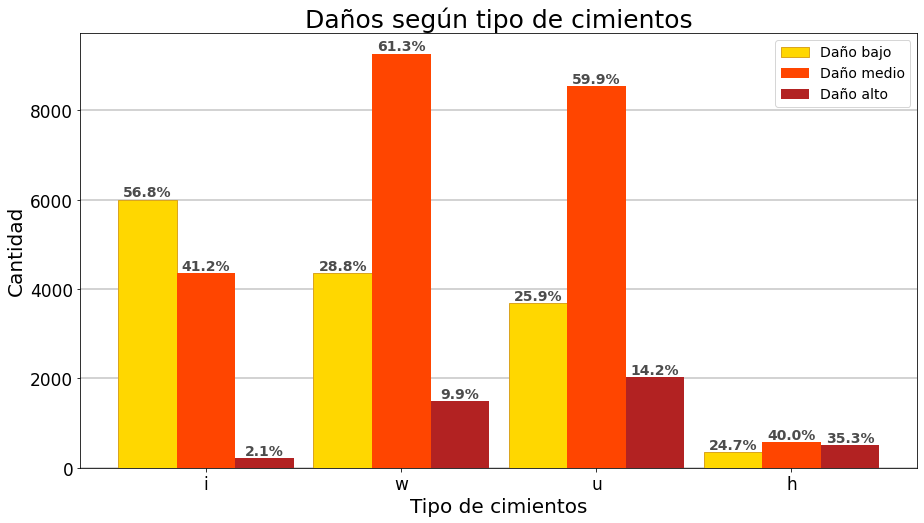

In [84]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_foun_type_b['foun_type']
x = np.arange(len(labels))
width = 0.3

bar1 = ax.bar(x - width, df_dmg_by_foun_type_b['cant_low_dmg'], width,\
              label='Daño bajo', color='gold', edgecolor='goldenrod')
bar2 = ax.bar(x , df_dmg_by_foun_type_b['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_foun_type_b['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

ax.set_title('Daños según tipo de cimientos', fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Tipo de cimientos', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_foun_type_b['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_foun_type_b['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_foun_type_b['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

# Daños según tipo de techo

## Dataframe de datos pertinentes

In [85]:
df_dmg_by_roof_type = df\
  .loc[df['damage_grade'] == 1, 'roof_type']\
  .value_counts().to_frame().reset_index()\
  .rename(columns={'index':'roof_type', \
                   'roof_type':'cant_low_dmg'})

df_dmg_by_roof_type

,roof_type,cant_low_dmg
0,n,13547
1,x,7651
2,q,3926


In [86]:
df_dmg_by_roof_type = df_dmg_by_roof_type\
  .merge(df\
         .loc[df['damage_grade'] == 2, 'roof_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'roof_type', \
                          'roof_type':'cant_med_dmg'}), \
         on = 'roof_type', how='left')
  
df_dmg_by_roof_type

,roof_type,cant_low_dmg,cant_med_dmg
0,n,13547,106447
1,x,7651,7803
2,q,3926,34009


In [87]:
df_dmg_by_roof_type = df_dmg_by_roof_type\
  .merge(df\
         .loc[df['damage_grade'] == 3, 'roof_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'roof_type', \
                          'roof_type':'cant_hig_dmg'}), \
         on = 'roof_type', how='left')
  
df_dmg_by_roof_type

,roof_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg
0,n,13547,106447,62848
1,x,7651,7803,729
2,q,3926,34009,23641


## Se añaden proporciones

In [88]:
# Suma de casos
df_dmg_by_roof_type['total'] = df_dmg_by_roof_type[['cant_low_dmg', 'cant_med_dmg', 'cant_hig_dmg']].sum(axis=1)
# Cálculo de proporciones, en %
df_dmg_by_roof_type['p_low'] = np.round(df_dmg_by_roof_type['cant_low_dmg']/df_dmg_by_roof_type['total']*100, 1)
df_dmg_by_roof_type['p_med'] = np.round(df_dmg_by_roof_type['cant_med_dmg']/df_dmg_by_roof_type['total']*100, 1)
df_dmg_by_roof_type['p_hig'] = np.round(df_dmg_by_roof_type['cant_hig_dmg']/df_dmg_by_roof_type['total']*100, 1)

df_dmg_by_roof_type

,roof_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,n,13547,106447,62848,182842,7.4,58.2,34.4
1,x,7651,7803,729,16183,47.3,48.2,4.5
2,q,3926,34009,23641,61576,6.4,55.2,38.4


## Plot

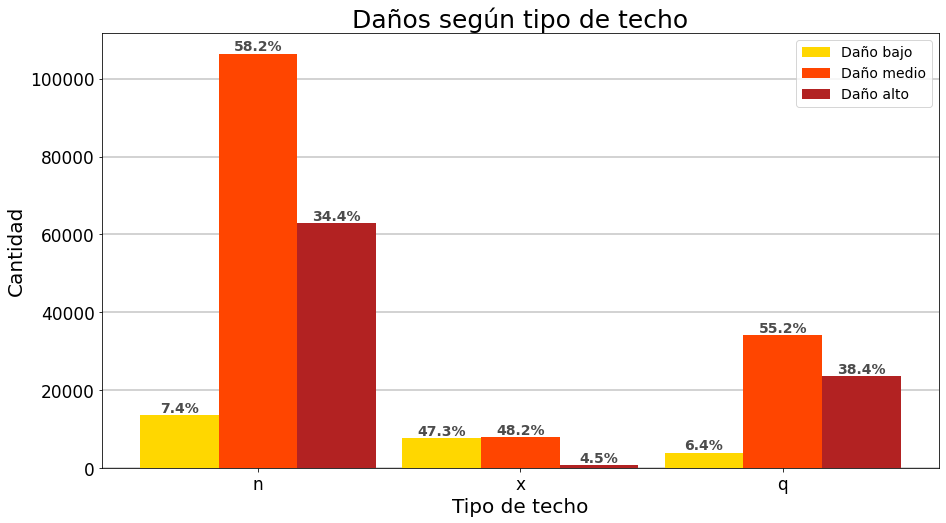

In [89]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_roof_type['roof_type']
x = np.arange(len(labels))
width = 0.3

bar1 = ax.bar(x - width, df_dmg_by_roof_type['cant_low_dmg'], width,\
              label='Daño bajo', color='gold')
bar2 = ax.bar(x , df_dmg_by_roof_type['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_roof_type['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

ax.set_title('Daños según tipo de techo', fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Tipo de techo', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_roof_type['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_roof_type['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_roof_type['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

# Daños según piso en la planta baja

## Dataframe de datos pertinentes

In [90]:
df_dmg_by_grnd_floo = df\
  .loc[df['damage_grade'] == 1, 'ground_floor_type']\
  .value_counts().to_frame().reset_index()\
  .rename(columns={'index':'ground_floor_type', \
                   'ground_floor_type':'cant_low_dmg'})

df_dmg_by_grnd_floo

,ground_floor_type,cant_low_dmg
0,f,12474
1,v,10309
2,x,2052
3,z,199
4,m,90


In [91]:
df_dmg_by_grnd_floo = df_dmg_by_grnd_floo\
  .merge(df\
         .loc[df['damage_grade'] == 2, 'ground_floor_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'ground_floor_type', \
                          'ground_floor_type':'cant_med_dmg'}), \
         on = 'ground_floor_type', how='left')
  
df_dmg_by_grnd_floo

,ground_floor_type,cant_low_dmg,cant_med_dmg
0,f,12474,119877
1,v,10309,12971
2,x,2052,14536
3,z,199,532
4,m,90,343


In [92]:
df_dmg_by_grnd_floo = df_dmg_by_grnd_floo\
  .merge(df\
         .loc[df['damage_grade'] == 3, 'ground_floor_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'ground_floor_type', \
                          'ground_floor_type':'cant_hig_dmg'}), \
         on = 'ground_floor_type', how='left')
  
df_dmg_by_grnd_floo

,ground_floor_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg
0,f,12474,119877,77268
1,v,10309,12971,1313
2,x,2052,14536,8289
3,z,199,532,273
4,m,90,343,75


## Se añaden proporciones

In [93]:
# Suma de casos
df_dmg_by_grnd_floo['total'] = df_dmg_by_grnd_floo[['cant_low_dmg', 'cant_med_dmg', 'cant_hig_dmg']].sum(axis=1)
# Cálculo de proporciones, en %
df_dmg_by_grnd_floo['p_low'] = np.round(df_dmg_by_grnd_floo['cant_low_dmg']/df_dmg_by_grnd_floo['total']*100, 1)
df_dmg_by_grnd_floo['p_med'] = np.round(df_dmg_by_grnd_floo['cant_med_dmg']/df_dmg_by_grnd_floo['total']*100, 1)
df_dmg_by_grnd_floo['p_hig'] = np.round(df_dmg_by_grnd_floo['cant_hig_dmg']/df_dmg_by_grnd_floo['total']*100, 1)

df_dmg_by_grnd_floo

,ground_floor_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,f,12474,119877,77268,209619,6.0,57.2,36.9
1,v,10309,12971,1313,24593,41.9,52.7,5.3
2,x,2052,14536,8289,24877,8.2,58.4,33.3
3,z,199,532,273,1004,19.8,53.0,27.2
4,m,90,343,75,508,17.7,67.5,14.8


## Tipo de pisos `f, v, x` en planta baja

In [94]:
df_dmg_by_grnd_floo_a = df_dmg_by_grnd_floo.drop([3, 4])
df_dmg_by_grnd_floo_a

,ground_floor_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,f,12474,119877,77268,209619,6.0,57.2,36.9
1,v,10309,12971,1313,24593,41.9,52.7,5.3
2,x,2052,14536,8289,24877,8.2,58.4,33.3


## Plot a

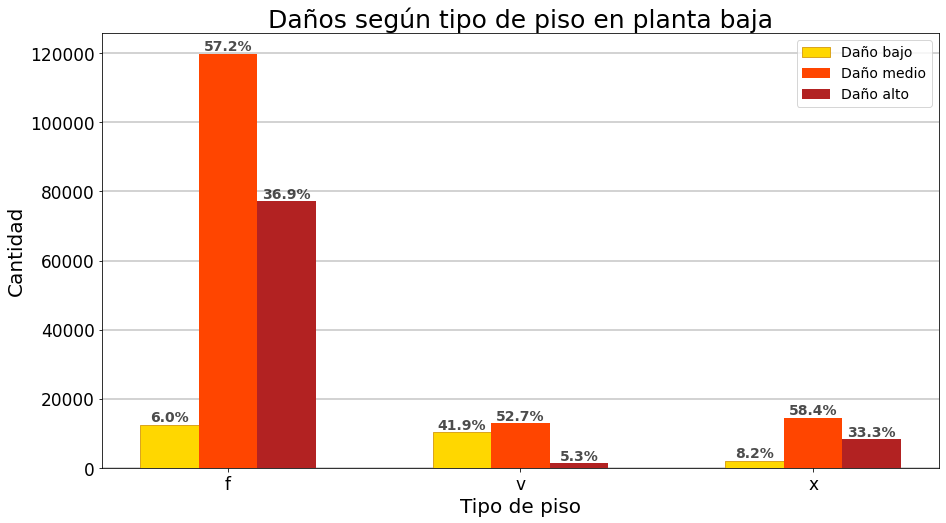

In [95]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_grnd_floo_a['ground_floor_type']
x = np.arange(len(labels))
width = 0.2

bar1 = ax.bar(x - width, df_dmg_by_grnd_floo_a['cant_low_dmg'], width,\
              label='Daño bajo', color='gold', edgecolor='goldenrod')
bar2 = ax.bar(x , df_dmg_by_grnd_floo_a['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_grnd_floo_a['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

ax.set_title('Daños según tipo de piso en planta baja', fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Tipo de piso', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_grnd_floo_a['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_grnd_floo_a['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_grnd_floo_a['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

## Tipo de pisos `z, m` en planta baja


In [96]:
df_dmg_by_grnd_floo_b = df_dmg_by_grnd_floo.drop([0, 1, 2])
df_dmg_by_grnd_floo_b

,ground_floor_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
3,z,199,532,273,1004,19.8,53.0,27.2
4,m,90,343,75,508,17.7,67.5,14.8


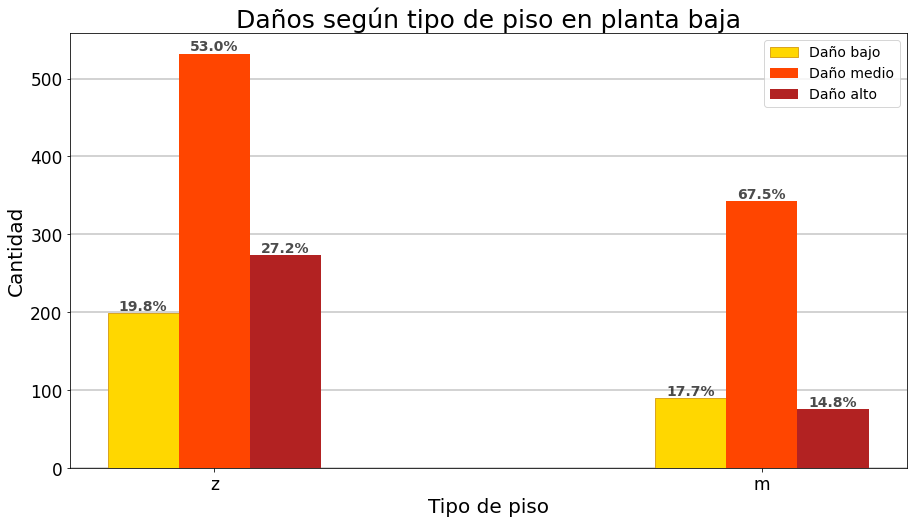

In [97]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_grnd_floo_b['ground_floor_type']
x = np.arange(len(labels))
width = 0.13

bar1 = ax.bar(x - width, df_dmg_by_grnd_floo_b['cant_low_dmg'], width,\
              label='Daño bajo', color='gold', edgecolor='goldenrod')
bar2 = ax.bar(x , df_dmg_by_grnd_floo_b['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_grnd_floo_b['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

ax.set_title('Daños según tipo de piso en planta baja', fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Tipo de piso', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_grnd_floo_b['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_grnd_floo_b['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_grnd_floo_b['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

# Daños según construcción de pisos superiores

## Dataframe de datos pertinentes

In [98]:
df_dmg_by_othe_floo = df\
  .loc[df['damage_grade'] == 1, 'other_floor_type']\
  .value_counts().to_frame().reset_index()\
  .rename(columns={'index':'other_floor_type', \
                   'other_floor_type':'cant_low_dmg'})

df_dmg_by_othe_floo

,other_floor_type,cant_low_dmg
0,j,8886
1,q,7387
2,s,5423
3,x,3428


In [99]:
df_dmg_by_othe_floo = df_dmg_by_othe_floo\
  .merge(df\
         .loc[df['damage_grade'] == 2, 'other_floor_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'other_floor_type', \
                          'other_floor_type':'cant_med_dmg'}), \
         on = 'other_floor_type', how='left')
  
df_dmg_by_othe_floo

,other_floor_type,cant_low_dmg,cant_med_dmg
0,j,8886,20362
1,q,7387,98320
2,s,5423,5904
3,x,3428,23673


In [100]:
df_dmg_by_othe_floo = df_dmg_by_othe_floo\
  .merge(df\
         .loc[df['damage_grade'] == 3, 'other_floor_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'other_floor_type', \
                          'other_floor_type':'cant_hig_dmg'}), \
         on = 'other_floor_type', how='left')
  
df_dmg_by_othe_floo

,other_floor_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg
0,j,8886,20362,10595
1,q,7387,98320,59575
2,s,5423,5904,701
3,x,3428,23673,16347


## Se añaden proporciones

In [101]:
# Suma de casos
df_dmg_by_othe_floo['total'] = df_dmg_by_othe_floo[['cant_low_dmg', 'cant_med_dmg', 'cant_hig_dmg']].sum(axis=1)
# Cálculo de proporciones, en %
df_dmg_by_othe_floo['p_low'] = np.round(df_dmg_by_othe_floo['cant_low_dmg']/df_dmg_by_othe_floo['total']*100, 1)
df_dmg_by_othe_floo['p_med'] = np.round(df_dmg_by_othe_floo['cant_med_dmg']/df_dmg_by_othe_floo['total']*100, 1)
df_dmg_by_othe_floo['p_hig'] = np.round(df_dmg_by_othe_floo['cant_hig_dmg']/df_dmg_by_othe_floo['total']*100, 1)

df_dmg_by_othe_floo

,other_floor_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,j,8886,20362,10595,39843,22.3,51.1,26.6
1,q,7387,98320,59575,165282,4.5,59.5,36.0
2,s,5423,5904,701,12028,45.1,49.1,5.8
3,x,3428,23673,16347,43448,7.9,54.5,37.6


## Plot

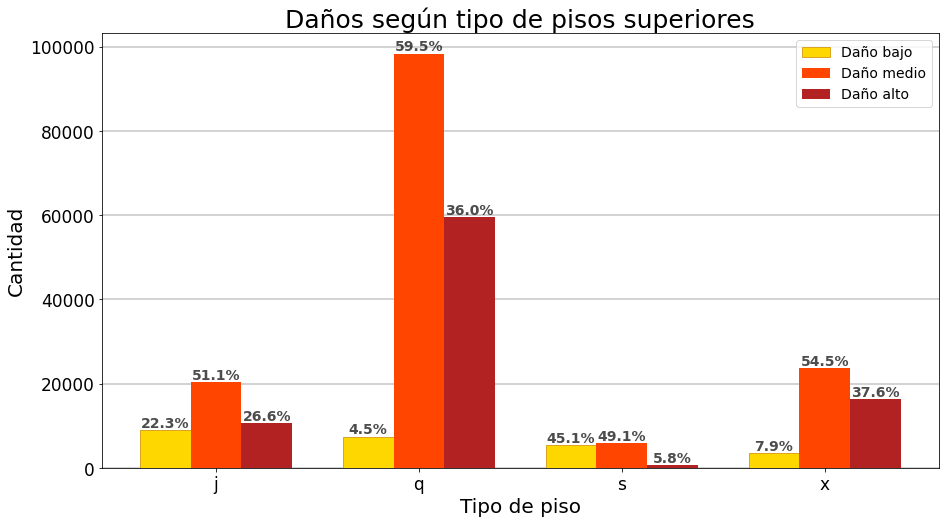

In [102]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_othe_floo['other_floor_type']
x = np.arange(len(labels))
width = 0.25

bar1 = ax.bar(x - width, df_dmg_by_othe_floo['cant_low_dmg'], width,\
              label='Daño bajo', color='gold', edgecolor='goldenrod')
bar2 = ax.bar(x , df_dmg_by_othe_floo['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_othe_floo['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

ax.set_title('Daños según tipo de pisos superiores', fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Tipo de piso', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_othe_floo['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_othe_floo['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_othe_floo['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

# Daños según orientación

## Dataframe de datos pertinentes

In [103]:
df_dmg_by_posi = df\
  .loc[df['damage_grade'] == 1, 'position']\
  .value_counts().to_frame().reset_index()\
  .rename(columns={'index':'position', \
                   'position':'cant_low_dmg'})

df_dmg_by_posi

,position,cant_low_dmg
0,s,19867
1,t,3462
2,j,1675
3,o,120


In [104]:
df_dmg_by_posi = df_dmg_by_posi\
  .merge(df\
         .loc[df['damage_grade'] == 2, 'position']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'position', \
                          'position':'cant_med_dmg'}), \
         on = 'position', how='left')
  
df_dmg_by_posi

,position,cant_low_dmg,cant_med_dmg
0,s,19867,116051
1,t,3462,22700
2,j,1675,7899
3,o,120,1609


In [105]:
df_dmg_by_posi = df_dmg_by_posi\
  .merge(df\
         .loc[df['damage_grade'] == 3, 'position']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'position', \
                          'position':'cant_hig_dmg'}), \
         on = 'position', how='left')
  
df_dmg_by_posi

,position,cant_low_dmg,cant_med_dmg,cant_hig_dmg
0,s,19867,116051,66172
1,t,3462,22700,16734
2,j,1675,7899,3708
3,o,120,1609,604


## Se añaden proporciones

In [106]:
# Suma de casos
df_dmg_by_posi['total'] = df_dmg_by_posi[['cant_low_dmg', 'cant_med_dmg', 'cant_hig_dmg']].sum(axis=1)
# Cálculo de proporciones, en %
df_dmg_by_posi['p_low'] = np.round(df_dmg_by_posi['cant_low_dmg']/df_dmg_by_posi['total']*100, 1)
df_dmg_by_posi['p_med'] = np.round(df_dmg_by_posi['cant_med_dmg']/df_dmg_by_posi['total']*100, 1)
df_dmg_by_posi['p_hig'] = np.round(df_dmg_by_posi['cant_hig_dmg']/df_dmg_by_posi['total']*100, 1)

df_dmg_by_posi

,position,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,s,19867,116051,66172,202090,9.8,57.4,32.7
1,t,3462,22700,16734,42896,8.1,52.9,39.0
2,j,1675,7899,3708,13282,12.6,59.5,27.9
3,o,120,1609,604,2333,5.1,69.0,25.9


## Plot

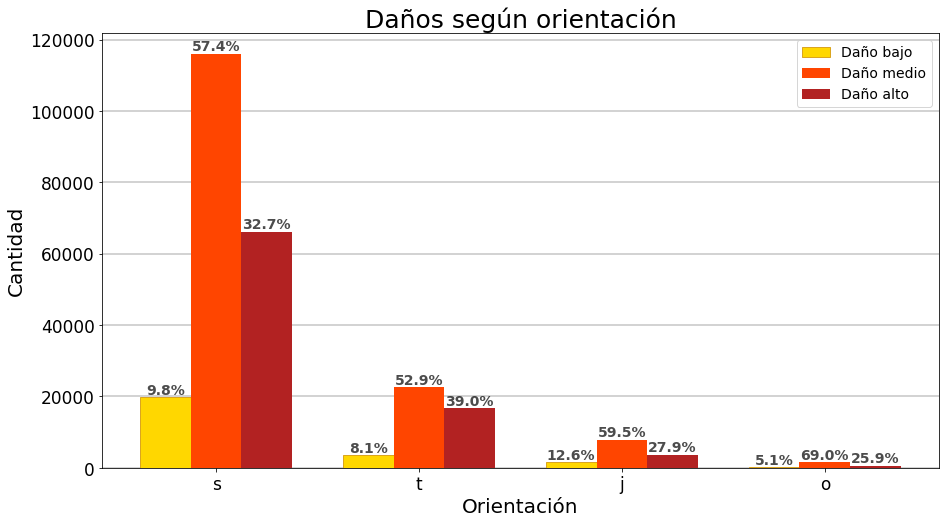

In [107]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_posi['position']
x = np.arange(len(labels))
width = 0.25

bar1 = ax.bar(x - width, df_dmg_by_posi['cant_low_dmg'], width,\
              label='Daño bajo', color='gold', edgecolor='goldenrod')
bar2 = ax.bar(x , df_dmg_by_posi['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_posi['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

ax.set_title('Daños según orientación', fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Orientación', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_posi['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_posi['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_posi['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

In [108]:
# Cantidad de edificaciones con orientación 'o'
for position in df_dmg_by_posi['position']:
  print('Orientación', position, '\tcant total:', \
        int(df_dmg_by_posi.loc[df_dmg_by_posi['position']==position, 'total']))

Orientación s 	cant total: 202090
Orientación t 	cant total: 42896
Orientación j 	cant total: 13282
Orientación o 	cant total: 2333


Hay muchas edificaciones con orientación **s** y muy pocas con orientación **o**.

# Daños según configuración de construcción para diseño sísmico

## Dataframe de datos pertinentes

In [109]:
df_dmg_by_plan_conf = df\
  .loc[df['damage_grade'] == 1, 'plan_configuration']\
  .value_counts().to_frame().reset_index()\
  .rename(columns={'index':'plan_configuration', \
                   'plan_configuration':'cant_low_dmg'})

df_dmg_by_plan_conf

,plan_configuration,cant_low_dmg
0,d,23310
1,q,781
2,u,774
3,c,86
4,a,66
5,s,53
6,o,40
7,m,8
8,n,6
9,f,0


In [110]:
df_dmg_by_plan_conf = df_dmg_by_plan_conf\
  .merge(df\
         .loc[df['damage_grade'] == 2, 'plan_configuration']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'plan_configuration', \
                          'plan_configuration':'cant_med_dmg'}), \
         on = 'plan_configuration', how='left')
  
df_dmg_by_plan_conf

,plan_configuration,cant_low_dmg,cant_med_dmg
0,d,23310,142523
1,q,781,2585
2,u,774,2399
3,c,86,206
4,a,66,157
5,s,53,223
6,o,40,96
7,m,8,34
8,n,6,20
9,f,0,16


In [111]:
df_dmg_by_plan_conf = df_dmg_by_plan_conf\
  .merge(df\
         .loc[df['damage_grade'] == 3, 'plan_configuration']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'plan_configuration', \
                          'plan_configuration':'cant_hig_dmg'}), \
         on = 'plan_configuration', how='left')
  
df_dmg_by_plan_conf

,plan_configuration,cant_low_dmg,cant_med_dmg,cant_hig_dmg
0,d,23310,142523,84239
1,q,781,2585,2326
2,u,774,2399,476
3,c,86,206,33
4,a,66,157,29
5,s,53,223,70
6,o,40,96,23
7,m,8,34,4
8,n,6,20,12
9,f,0,16,6


## Se añaden proporciones

In [112]:
# Suma de casos
df_dmg_by_plan_conf['total'] = df_dmg_by_plan_conf[['cant_low_dmg', 'cant_med_dmg', 'cant_hig_dmg']].sum(axis=1)
# Cálculo de proporciones, en %
df_dmg_by_plan_conf['p_low'] = np.round(df_dmg_by_plan_conf['cant_low_dmg']/df_dmg_by_plan_conf['total']*100, 1)
df_dmg_by_plan_conf['p_med'] = np.round(df_dmg_by_plan_conf['cant_med_dmg']/df_dmg_by_plan_conf['total']*100, 1)
df_dmg_by_plan_conf['p_hig'] = np.round(df_dmg_by_plan_conf['cant_hig_dmg']/df_dmg_by_plan_conf['total']*100, 1)

df_dmg_by_plan_conf

,plan_configuration,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,d,23310,142523,84239,250072,9.3,57.0,33.7
1,q,781,2585,2326,5692,13.7,45.4,40.9
2,u,774,2399,476,3649,21.2,65.7,13.0
3,c,86,206,33,325,26.5,63.4,10.2
4,a,66,157,29,252,26.2,62.3,11.5
5,s,53,223,70,346,15.3,64.5,20.2
6,o,40,96,23,159,25.2,60.4,14.5
7,m,8,34,4,46,17.4,73.9,8.7
8,n,6,20,12,38,15.8,52.6,31.6
9,f,0,16,6,22,0.0,72.7,27.3


## Dataframe plan_conf = `d`

In [113]:
df_dmg_by_plan_conf_a = df_dmg_by_plan_conf.loc[df_dmg_by_plan_conf['plan_configuration']=='d']
df_dmg_by_plan_conf_a

,plan_configuration,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,d,23310,142523,84239,250072,9.3,57.0,33.7


## Plot a

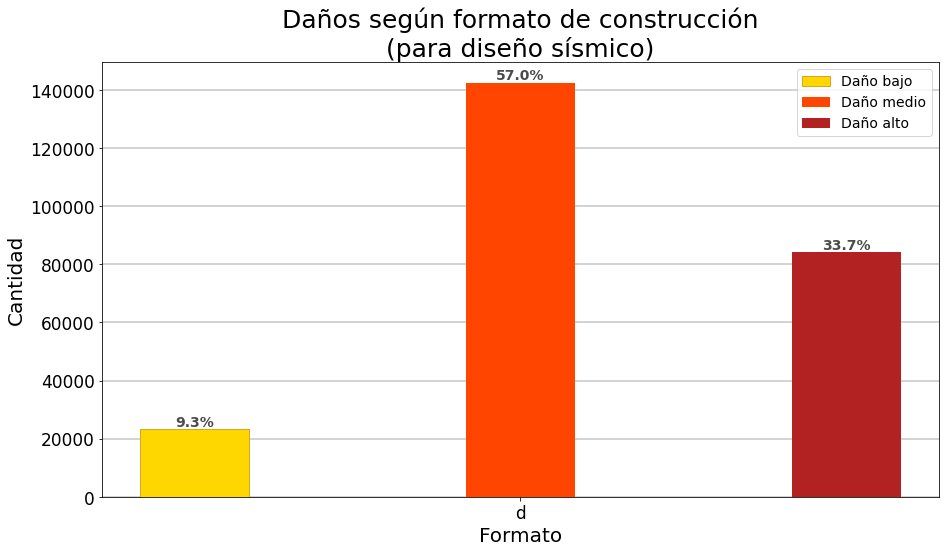

In [114]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_plan_conf_a['plan_configuration']
x = np.arange(len(labels))
width = 0.2

bar1 = ax.bar(x - 3*width, df_dmg_by_plan_conf_a['cant_low_dmg'], width,\
              label='Daño bajo', color='gold', edgecolor='goldenrod')
bar2 = ax.bar(x , df_dmg_by_plan_conf_a['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + 3*width, df_dmg_by_plan_conf_a['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

title = '''Daños según formato de construcción
(para diseño sísmico)'''
ax.set_title(title, fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Formato', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_plan_conf_a['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_plan_conf_a['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_plan_conf_a['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

El formato `d` tiene mucho peso comparado con los demás.

## Dataframe con formatos de construcción `q, u`

In [115]:
df_dmg_by_plan_conf_b = df_dmg_by_plan_conf.loc[(df_dmg_by_plan_conf['plan_configuration'] == 'q') | \
                                                    (df_dmg_by_plan_conf['plan_configuration'] == 'u')]
df_dmg_by_plan_conf_b

,plan_configuration,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
1,q,781,2585,2326,5692,13.7,45.4,40.9
2,u,774,2399,476,3649,21.2,65.7,13.0


## Plot b

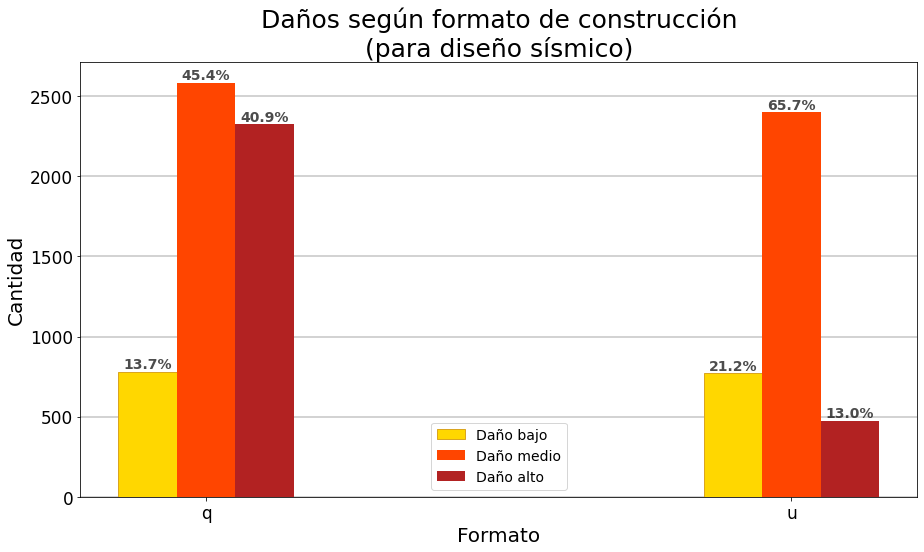

In [116]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_plan_conf_b['plan_configuration']
x = np.arange(len(labels))
width = 0.1

bar1 = ax.bar(x - width, df_dmg_by_plan_conf_b['cant_low_dmg'], width,\
              label='Daño bajo', color='gold', edgecolor='goldenrod')
bar2 = ax.bar(x , df_dmg_by_plan_conf_b['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_plan_conf_b['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

title = '''Daños según formato de construcción
(para diseño sísmico)'''
ax.set_title(title, fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Formato', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_plan_conf_b['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_plan_conf_b['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_plan_conf_b['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

## Dataframe sin formato de construcción `d, q, u`

In [117]:
df_dmg_by_plan_conf_c = df_dmg_by_plan_conf.drop([0, 1, 2])
df_dmg_by_plan_conf_c

,plan_configuration,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
3,c,86,206,33,325,26.5,63.4,10.2
4,a,66,157,29,252,26.2,62.3,11.5
5,s,53,223,70,346,15.3,64.5,20.2
6,o,40,96,23,159,25.2,60.4,14.5
7,m,8,34,4,46,17.4,73.9,8.7
8,n,6,20,12,38,15.8,52.6,31.6
9,f,0,16,6,22,0.0,72.7,27.3


## Plot c

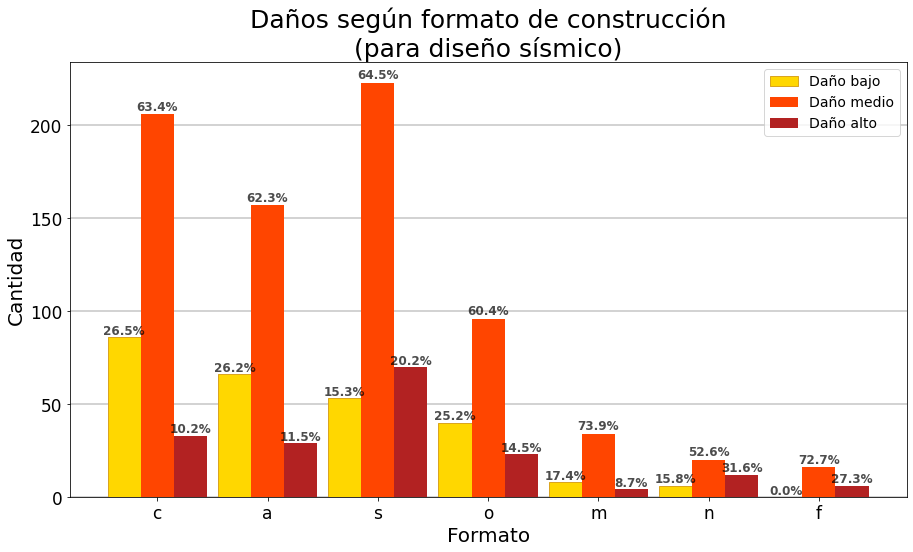

In [118]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_plan_conf_c['plan_configuration']
x = np.arange(len(labels))
width = 0.3

bar1 = ax.bar(x - width, df_dmg_by_plan_conf_c['cant_low_dmg'], width,\
              label='Daño bajo', color='gold', edgecolor='goldenrod')
bar2 = ax.bar(x , df_dmg_by_plan_conf_c['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_plan_conf_c['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

title = '''Daños según formato de construcción
(para diseño sísmico)'''
ax.set_title(title, fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Formato', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_plan_conf_c['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=12, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_plan_conf_c['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=12, padding=1, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_plan_conf_c['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=12, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

# Análisis de edificaciones con uso secundario

## Verificación de datos para usos secundarios

Se verifica que las edificaciones que tienen segundo uso lo identifiquen.

In [119]:
# Se verifica que las edificaciones que tienen segundo uso lo identifiquen
df\
  .loc[df['has_secondary_use'] == 1, 'has_secondary_use':'has_secondary_use_other']\
  .sum(axis=1).value_counts()

2    28599
3      557
dtype: int64

Como no hay ninguno con 1 todas las edificaciones con uso secundario identifican al menos uno de esos usos.

A continuación se verifica que las edificaciones que no acusan uso secundario no tengan identificaciones de alguno.

In [120]:
df\
  .loc[df['has_secondary_use'] == 0, 'has_secondary_use':'has_secondary_use_other']\
  .sum(axis=1).value_counts()

0    231445
dtype: int64

Todas las edificaciones suman cero. Los datos son coherentes.

## Dataframe para usos secundarios

In [121]:
columnas = ['has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other',
       'damage_grade']

df_secondary = df[columnas]

# Conteo entre edificios con y sin usos secundarios

In [122]:
v_usos = df['has_secondary_use'].value_counts()
v_usos

False    231445
True      29156
Name: has_secondary_use, dtype: int64

## Plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


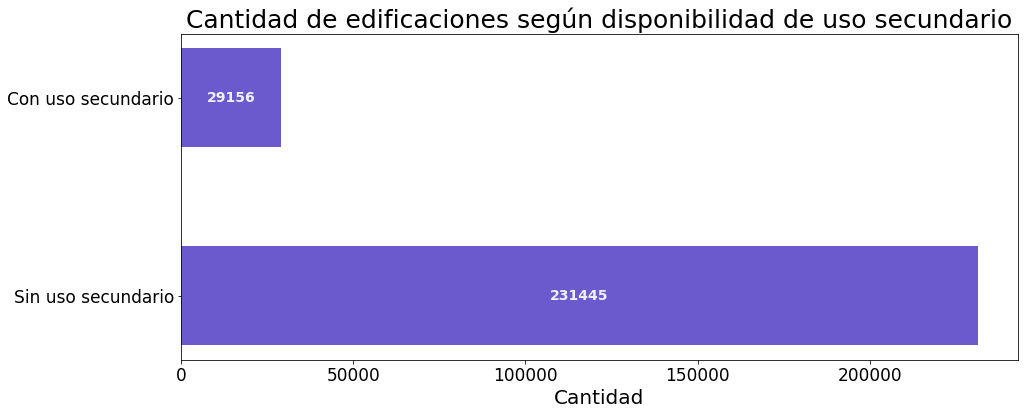

In [123]:
fig, ax=plt.subplots(figsize=(15,6))
labels = ['Sin uso secundario', 'Con uso secundario']
x = np.arange(len(labels))
plot = ax.barh(y=labels, width=v_usos, height=0.5, color='slateblue')
ax.set_yticklabels(labels, fontsize=17)

plt.title('Cantidad de edificaciones según disponibilidad de uso secundario', fontsize=25)
plt.xlabel('Cantidad', fontsize=20)
plt.xticks(fontsize=17)

# Cantidades
ax.bar_label(plot, labels=v_usos.values, padding=0, \
             label_type='center', color='white', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.9)

plt.show()

# Daños entre edificaciones con o sin uso secundario

In [124]:
df_use = df.loc[:, ['has_secondary_use', 'damage_grade']].copy()
df_use.sample(3, random_state=33)

,has_secondary_use,damage_grade
146173,False,3
253461,False,3
81684,True,1


In [125]:
df_use_by_dmg = df_use\
  .groupby(['damage_grade', 'has_secondary_use'])\
  .agg({'has_secondary_use':'count'})\
  .rename(columns={'has_secondary_use':'count'})\
  .reset_index()

df_use_by_dmg = df_use_by_dmg.\
  pivot(index='damage_grade', columns='has_secondary_use', values='count')\

df_use_by_dmg\
  .rename(columns={False:'one_use', True:'other_use'}, inplace=True)

df_use_by_dmg.columns.name = None

df_use_by_dmg

,one_use,other_use
damage_grade,,
1,20876,4248
2,130544,17715
3,80025,7193


In [126]:
# Se agregan proporciones
df_use_by_dmg['prop_one_use'] = df_use_by_dmg['one_use']/df_use_by_dmg['one_use'].sum()*100
df_use_by_dmg['prop_other_use'] = df_use_by_dmg['other_use']/df_use_by_dmg['other_use'].sum()*100

df_use_by_dmg

,one_use,other_use,prop_one_use,prop_other_use
damage_grade,,,,
1,20876,4248,9.019854,14.569900
2,130544,17715,56.403897,60.759363
3,80025,7193,34.576249,24.670737


In [127]:
df_prop = df_use_by_dmg.T.reset_index().drop([0,1])\
  .rename(columns={'index':'type', 1:'Bajo', 2:'Medio', 3:'Alto'})\
  .replace({'prop_one_use':'Sin uso secundario', 'prop_other_use':'Con uso secundario'})
df_prop

damage_grade,type,Bajo,Medio,Alto
2,Sin uso secundario,9.019854,56.403897,34.576249
3,Con uso secundario,14.569900,60.759363,24.670737


## Plot

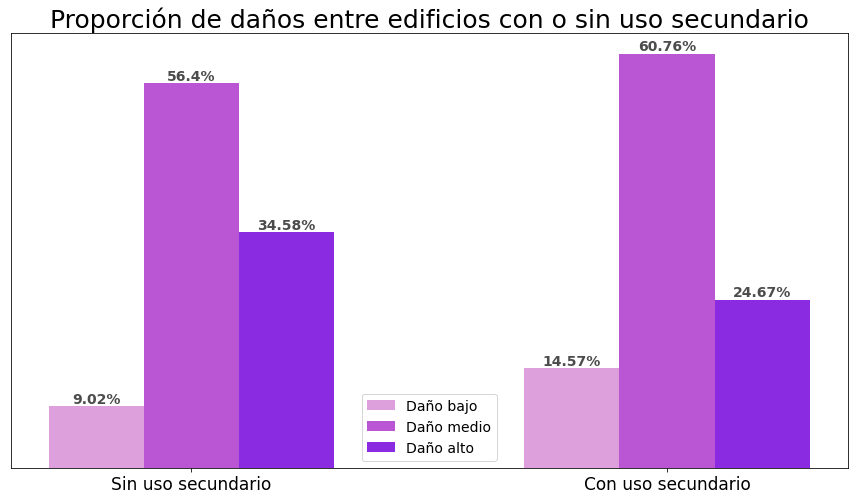

In [128]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_prop['type']
x = np.arange(len(labels))
width = 0.2

bar1 = ax.bar(x - width, df_prop['Bajo'], width,\
              label='Daño bajo', color='plum')
bar2 = ax.bar(x , df_prop['Medio'], width,\
              label='Daño medio', color='mediumorchid')
bar3 = ax.bar(x + width, df_prop['Alto'], width,\
              label='Daño alto', color='blueviolet')

ax.set_title('Proporción de daños entre edificios con o sin uso secundario', fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks([], fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=np.round(df_prop['Bajo'], 2).astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=np.round(df_prop['Medio'], 2).astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=np.round(df_prop['Alto'], 2).astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

# Cantidad de edificaciones con usos secundarios


In [129]:
# No es necesaria la columna de daños
cantidades = df_secondary\
  .loc[:, df_secondary.columns != 'damage_grade']\
  .sum(axis=0).sort_values(ascending=True)

cantidades

has_secondary_use_use_police        23
has_secondary_use_gov_office        38
has_secondary_use_health_post       49
has_secondary_use_school            94
has_secondary_use_institution      245
has_secondary_use_industry         279
has_secondary_use_other           1334
has_secondary_use_rental          2111
has_secondary_use_hotel           8763
has_secondary_use_agriculture    16777
dtype: int64

In [130]:
# Cambio de nombres para el índice
cantidades.index = ['est. policial', 'of. govierno', 'posta sanitaria', \
                    'escuela', 'institución', 'industria', 'otro', 'alquiler', \
                    'hotel', 'agricultura']
cantidades

est. policial         23
of. govierno          38
posta sanitaria       49
escuela               94
institución          245
industria            279
otro                1334
alquiler            2111
hotel               8763
agricultura        16777
dtype: int64

## Plot

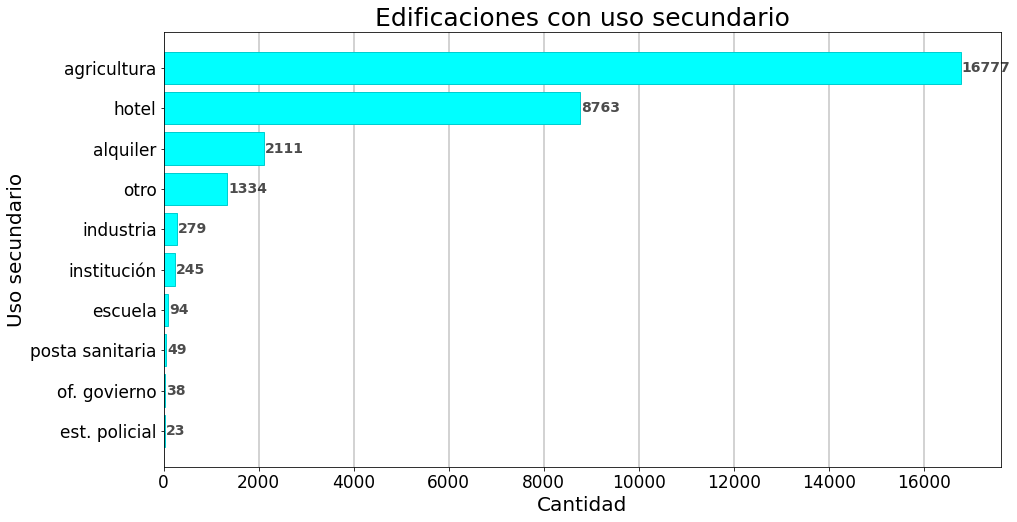

In [131]:
fig,ax = plt.subplots(figsize=(15,8))

x = np.arange(len(cantidades))
width = 0.8

plot = ax.barh(x, cantidades.values, width, color='aqua', edgecolor='darkturquoise')

ax.set_title('Edificaciones con uso secundario', fontsize=25)
ax.set_xlabel('Cantidad', fontsize=20)
ax.set_ylabel('Uso secundario', fontsize=20)
ax.set_yticks(x)
ax.set_yticklabels(cantidades.index)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.grid(axis='x', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Cantidades
ax.bar_label(plot, labels=cantidades.values, padding=1, \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

# Daños para edificaciones con usos secundarios

In [132]:
# Se arma Datafrae de daños para edificaciones con usos secundarios
df_dmg_by_sec_use = df_secondary\
  .loc[: , ['has_secondary_use_agriculture', 'damage_grade']]\
  .groupby('damage_grade').agg({'has_secondary_use_agriculture':'sum'})\
  .rename(columns={'has_secondary_use_agriculture':'agricultura'})

df_dmg_by_sec_use = df_dmg_by_sec_use\
  .merge(df_secondary\
         .loc[: , ['has_secondary_use_hotel', 'damage_grade']]\
         .groupby('damage_grade').agg({'has_secondary_use_hotel':'sum'})\
         .rename(columns={'has_secondary_use_hotel':'hotel'}), \
         on='damage_grade', how='left')

df_dmg_by_sec_use = df_dmg_by_sec_use\
  .merge(df_secondary\
         .loc[: , ['has_secondary_use_rental', 'damage_grade']]\
         .groupby('damage_grade').agg({'has_secondary_use_rental':'sum'})\
         .rename(columns={'has_secondary_use_rental':'alquiler'}), \
         on='damage_grade', how='left')

df_dmg_by_sec_use = df_dmg_by_sec_use\
  .merge(df_secondary\
         .loc[: , ['has_secondary_use_institution', 'damage_grade']]\
         .groupby('damage_grade').agg({'has_secondary_use_institution':'sum'})\
         .rename(columns={'has_secondary_use_institution':'institución'}), \
         on='damage_grade', how='left')

df_dmg_by_sec_use = df_dmg_by_sec_use\
  .merge(df_secondary\
         .loc[: , ['has_secondary_use_school', 'damage_grade']]\
         .groupby('damage_grade').agg({'has_secondary_use_school':'sum'})\
         .rename(columns={'has_secondary_use_school':'escuela'}), \
         on='damage_grade', how='left')

df_dmg_by_sec_use = df_dmg_by_sec_use\
  .merge(df_secondary\
         .loc[: , ['has_secondary_use_industry', 'damage_grade']]\
         .groupby('damage_grade').agg({'has_secondary_use_industry':'sum'})\
         .rename(columns={'has_secondary_use_industry':'industria'}), \
         on='damage_grade', how='left')

df_dmg_by_sec_use = df_dmg_by_sec_use\
  .merge(df_secondary\
         .loc[: , ['has_secondary_use_health_post', 'damage_grade']]\
         .groupby('damage_grade').agg({'has_secondary_use_health_post':'sum'})\
         .rename(columns={'has_secondary_use_health_post':'posta sanitaria'}), \
         on='damage_grade', how='left')

df_dmg_by_sec_use = df_dmg_by_sec_use\
  .merge(df_secondary\
         .loc[: , ['has_secondary_use_gov_office', 'damage_grade']]\
         .groupby('damage_grade').agg({'has_secondary_use_gov_office':'sum'})\
         .rename(columns={'has_secondary_use_gov_office':'oficina gubernamental'}), \
         on='damage_grade', how='left')

df_dmg_by_sec_use = df_dmg_by_sec_use\
  .merge(df_secondary\
         .loc[: , ['has_secondary_use_use_police', 'damage_grade']]\
         .groupby('damage_grade').agg({'has_secondary_use_use_police':'sum'})\
         .rename(columns={'has_secondary_use_use_police':'estación de policía'}), \
         on='damage_grade', how='left')

df_dmg_by_sec_use = df_dmg_by_sec_use\
  .merge(df_secondary\
         .loc[: , ['has_secondary_use_other', 'damage_grade']]\
         .groupby('damage_grade').agg({'has_secondary_use_other':'sum'})\
         .rename(columns={'has_secondary_use_other':'otro'}), \
         on='damage_grade', how='left')
  
# Se traspone el Dataframe
df_dmg_by_sec_use = df_dmg_by_sec_use.T.reset_index()\
  .rename(columns={'index':'type', 1:'cant_low_dmg', 2:'cant_med_dmg', 3:'cant_hig_dmg'})\

df_dmg_by_sec_use.index.name = None

df_dmg_by_sec_use

damage_grade,type,cant_low_dmg,cant_med_dmg,cant_hig_dmg
0,agricultura,829,10679,5269
1,hotel,2216,5058,1489
2,alquiler,877,1051,183
3,institución,99,129,17
4,escuela,30,47,17
5,industria,59,152,68
6,posta sanitaria,12,32,5
7,oficina gubernamental,13,21,4
8,estación de policía,4,12,7
9,otro,175,852,307


In [133]:
# Se agregan proporciones
# Suma de casos
df_dmg_by_sec_use['total'] = df_dmg_by_sec_use[['cant_low_dmg', 'cant_med_dmg', 'cant_hig_dmg']].sum(axis=1)
# Cálculo de proporciones, en %
df_dmg_by_sec_use['p_low'] = np.round(df_dmg_by_sec_use['cant_low_dmg']/df_dmg_by_sec_use['total']*100, 1)
df_dmg_by_sec_use['p_med'] = np.round(df_dmg_by_sec_use['cant_med_dmg']/df_dmg_by_sec_use['total']*100, 1)
df_dmg_by_sec_use['p_hig'] = np.round(df_dmg_by_sec_use['cant_hig_dmg']/df_dmg_by_sec_use['total']*100, 1)

df_dmg_by_sec_use

damage_grade,type,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,agricultura,829,10679,5269,16777,4.9,63.7,31.4
1,hotel,2216,5058,1489,8763,25.3,57.7,17.0
2,alquiler,877,1051,183,2111,41.5,49.8,8.7
3,institución,99,129,17,245,40.4,52.7,6.9
4,escuela,30,47,17,94,31.9,50.0,18.1
5,industria,59,152,68,279,21.1,54.5,24.4
6,posta sanitaria,12,32,5,49,24.5,65.3,10.2
7,oficina gubernamental,13,21,4,38,34.2,55.3,10.5
8,estación de policía,4,12,7,23,17.4,52.2,30.4
9,otro,175,852,307,1334,13.1,63.9,23.0


## Los cuatro usos secundarios más ocurrentes

In [134]:
df_dmg_by_sec_use_a = df_dmg_by_sec_use.drop([3,4,5,6,7,8]).copy()
df_dmg_by_sec_use_a

damage_grade,type,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
0,agricultura,829,10679,5269,16777,4.9,63.7,31.4
1,hotel,2216,5058,1489,8763,25.3,57.7,17.0
2,alquiler,877,1051,183,2111,41.5,49.8,8.7
9,otro,175,852,307,1334,13.1,63.9,23.0


## Plot a

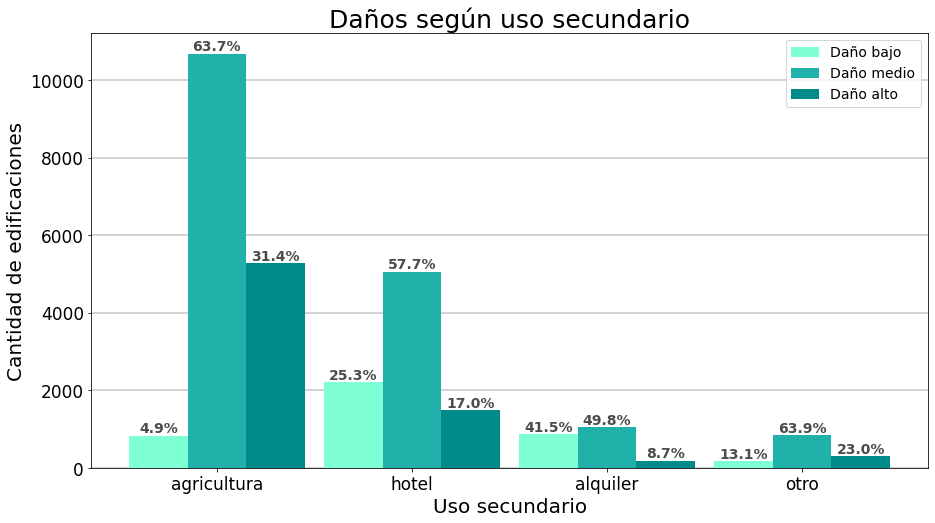

In [135]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_sec_use_a['type']
x = np.arange(len(labels))
width = 0.3

bar1 = ax.bar(x - width, df_dmg_by_sec_use_a['cant_low_dmg'], width,\
              label='Daño bajo', color='aquamarine')
bar2 = ax.bar(x , df_dmg_by_sec_use_a['cant_med_dmg'], width,\
              label='Daño medio', color='lightseagreen')
bar3 = ax.bar(x + width, df_dmg_by_sec_use_a['cant_hig_dmg'], width,\
              label='Daño alto', color='darkcyan')

ax.set_title('Daños según uso secundario', fontsize=25)
ax.set_ylabel('Cantidad de edificaciones', fontsize=20)
ax.set_xlabel('Uso secundario', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_sec_use_a['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_sec_use_a['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_sec_use_a['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=14, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()

## Resto de los usos secundarios

In [136]:
df_dmg_by_sec_use_b = df_dmg_by_sec_use.drop([0,1,2,9]).copy()
df_dmg_by_sec_use_b

damage_grade,type,cant_low_dmg,cant_med_dmg,cant_hig_dmg,total,p_low,p_med,p_hig
3,institución,99,129,17,245,40.4,52.7,6.9
4,escuela,30,47,17,94,31.9,50.0,18.1
5,industria,59,152,68,279,21.1,54.5,24.4
6,posta sanitaria,12,32,5,49,24.5,65.3,10.2
7,oficina gubernamental,13,21,4,38,34.2,55.3,10.5
8,estación de policía,4,12,7,23,17.4,52.2,30.4


## Plot b

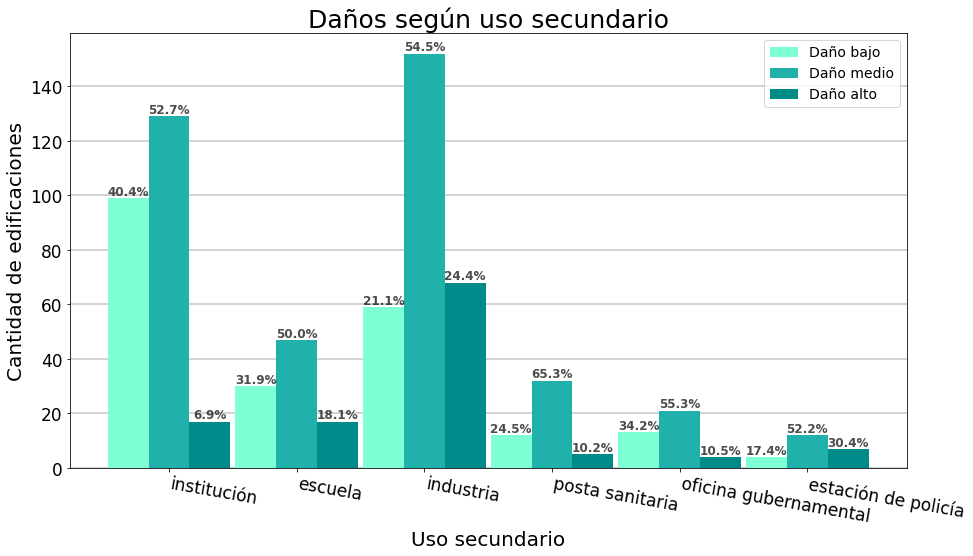

In [137]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_sec_use_b['type']
x = np.arange(len(labels))
width = 0.32

bar1 = ax.bar(x - width, df_dmg_by_sec_use_b['cant_low_dmg'], width,\
              label='Daño bajo', color='aquamarine')
bar2 = ax.bar(x , df_dmg_by_sec_use_b['cant_med_dmg'], width,\
              label='Daño medio', color='lightseagreen')
bar3 = ax.bar(x + width, df_dmg_by_sec_use_b['cant_hig_dmg'], width,\
              label='Daño alto', color='darkcyan')

ax.set_title('Daños según uso secundario', fontsize=25)
ax.set_ylabel('Cantidad de edificaciones', fontsize=20)
ax.set_xlabel('Uso secundario', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17, rotation=-10, ha='left')
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Proporciones
ax.bar_label(bar1, labels=df_dmg_by_sec_use_b['p_low'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=12, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar2, labels=df_dmg_by_sec_use_b['p_med'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=12, padding=0, \
             fontweight='bold', rotation=0, alpha=0.7)
ax.bar_label(bar3, labels=df_dmg_by_sec_use_b['p_hig'].astype('str')+'%', \
             label_type='edge', color='black', fontsize=12, \
             fontweight='bold', rotation=0, alpha=0.7)

plt.show()